# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-15

Tentang dataset:


Objective:


Dataset name: living-index-and-internet-prices.csv

Dataset Description : Dataset ini berisi index harga barang/kebutuhan disuatu negara.
Column | Description
--- | ---
Country | Nama Negara
Country code | Inisial Negara
Countinental Region | Region Negara
Cost of Living Index | Indikator terhadap barang konsumsi, termasuk barang makanan, transportasi dan utilitas, Indikator ini tidak termasuk tempat tinggal
Rent Index | indikator terhadap biaya tempat tinggal
Groceries Index | indikator terhadap bahan makanan
Restaurant Price Index | Indikator terhadap harga makanan dan minuman diresto dan bar
Local Purchasing Index | indikator yang menunjukkan daya beli masyarakat di negara tersebut dalam membeli barang dan jasa terhadap rata-rata bersih yang diterima
Number of Internet Plans | Total jumlah provider internet yang tersedia disuatu negara 
Avarage Price per 1GB (USD) | Rata-rata harga Internet per 1GB per bulan
Cheaped Price per 1GB (USD) | Harga Internet termurah per 1GB PER bulan
Most Expensive Price per 1GB | Harga Internet Termahal per 1GB per bulan
Internet Users | Jumlah penduduk yang menggunakan Internet
Population | Total Populasi

Catatan : 
Column-column dibawah ini menandakan semakin tinggi nilainya, maka biaya yang dibutuhkan semakin besar di negara tersebut.

- Cost of Living Index
- Rent Index
- Groceries Index
- Restaurant Price Index
- Local Purchasing Power Index

---

# ii. Import Libraries

In [61]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.decomposition import PCA


# model clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples

# Library handling outlier
from feature_engine.outliers import Winsorizer
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Save model
import pickle
import joblib
import json


# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# iii. Data loading

In [62]:
# Load Data
df = pd.read_csv('datasets/living-index-and-internet-prices.csv')
df

Unnamed: 0      Country Country code    Continental Region  \
0             0  Afghanistan           AF  ASIA (EX. NEAR EAST)   
1             1      Albania           AL        EASTERN EUROPE   
2             2      Algeria           DZ       NORTHERN AFRICA   
3             3    Argentina           AR         SOUTH AMERICA   
4             4      Armenia           AM     CIS (FORMER USSR)   
..          ...          ...          ...                   ...   
132         132      Uruguay           UY         SOUTH AMERICA   
133         133   Uzbekistan           UZ     CIS (FORMER USSR)   
134         134      Vietnam           VN  ASIA (EX. NEAR EAST)   
135         135        Yemen           YE             NEAR EAST   
136         136       Zambia           ZM    SUB-SAHARAN AFRICA   

     Cost of Living Index  Rent Index  Groceries Index  \
0                   20.37        2.72            14.92   
1                   35.50        8.47            29.32   
2                   26.87        4.59            28.82   
3                   34.69        7.71            28.17   
4                   33.89       11.61            27.59   
..                    ...         ...              ...   
132                 52.07       13.93            44.01   
133                 27.31        9.29            26.83   
134                 37.48       13.22            38.70   
135                 53.14        6.71            67.12   
136                 33.04        9.26            31.53   

     Restaurant Price Index  Local Purchasing Power Index  \
0                     12.41                         23.04   
1                     25.82                         30.19   
2                     14.48                         24.63   
3                     33.32                         30.72   
4                     30.55                         28.86   
..                      ...                           ...   
132                   49.39                         30.07   
133                   24.22                         22.37   
134                   19.98                         29.38   
135                   24.74                         14.41   
136                   22.46                         40.33   

     Number of Internet Plans  Average Price per 1GB (USD)  \
0                        35.0                         1.02   
1                        32.0                         2.80   
2                        20.0                         0.51   
3                        28.0                         2.38   
4                        21.0                         0.76   
..                        ...                          ...   
132                      35.0                         1.51   
133                      60.0                         0.60   
134                      46.0                         0.49   
135                      17.0                        15.98   
136                      60.0                         1.13   

     Cheapest Price per 1GB (USD)  Most Expensive Price per 1GB (USD)  \
0                            0.38                                2.12   
1                            0.72                               96.39   
2                            0.16                                2.24   
3                            0.44                               11.47   
4                            0.22                               13.02   
..                            ...                                 ...   
132                          0.10                                6.33   
133                          0.01                               23.75   
134                          0.07                                5.55   
135                          0.40                               39.94   
136                          0.01                                6.80   

    Internet Users  Population  
0        4,068,194  37,171,921  
1        2,105,339   2,882,740  
2       26,350,000  42,228,408  
3       33,561,8

In [63]:
# Checking size
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  137
Jumlah Kolom:  15


In [64]:
# Data 5 teratas 
df.head()

Unnamed: 0      Country Country code    Continental Region  \
0           0  Afghanistan           AF  ASIA (EX. NEAR EAST)   
1           1      Albania           AL        EASTERN EUROPE   
2           2      Algeria           DZ       NORTHERN AFRICA   
3           3    Argentina           AR         SOUTH AMERICA   
4           4      Armenia           AM     CIS (FORMER USSR)   

   Cost of Living Index  Rent Index  Groceries Index  Restaurant Price Index  \
0                 20.37        2.72            14.92                   12.41   
1                 35.50        8.47            29.32                   25.82   
2                 26.87        4.59            28.82                   14.48   
3                 34.69        7.71            28.17                   33.32   
4                 33.89       11.61            27.59                   30.55   

   Local Purchasing Power Index  Number of Internet Plans  \
0                         23.04                      35.0   
1                         30.19                      32.0   
2                         24.63                      20.0   
3                         30.72                      28.0   
4                         28.86                      21.0   

   Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                         1.02                          0.38   
1                         2.80                          0.72   
2                         0.51                          0.16   
3                         2.38                          0.44   
4                         0.76                          0.22   

   Most Expensive Price per 1GB (USD) Internet Users  Population  
0                                2.12      4,068,194  37,171,921  
1                               96.39      2,105,339   2,882,740  
2                                2.24     26,350,000  42,228,408  
3                               11.47     33,561,876  44,361,150  
4                               13.02      2,043,110   2,951,745

In [65]:
# Data 5 Terbawah
df.tail()

Unnamed: 0     Country Country code    Continental Region  \
132         132     Uruguay           UY         SOUTH AMERICA   
133         133  Uzbekistan           UZ     CIS (FORMER USSR)   
134         134     Vietnam           VN  ASIA (EX. NEAR EAST)   
135         135       Yemen           YE             NEAR EAST   
136         136      Zambia           ZM    SUB-SAHARAN AFRICA   

     Cost of Living Index  Rent Index  Groceries Index  \
132                 52.07       13.93            44.01   
133                 27.31        9.29            26.83   
134                 37.48       13.22            38.70   
135                 53.14        6.71            67.12   
136                 33.04        9.26            31.53   

     Restaurant Price Index  Local Purchasing Power Index  \
132                   49.39                         30.07   
133                   24.22                         22.37   
134                   19.98                         29.38   
135                   24.74                         14.41   
136                   22.46                         40.33   

     Number of Internet Plans  Average Price per 1GB (USD)  \
132                      35.0                         1.51   
133                      60.0                         0.60   
134                      46.0                         0.49   
135                      17.0                        15.98   
136                      60.0                         1.13   

     Cheapest Price per 1GB (USD)  Most Expensive Price per 1GB (USD)  \
132                          0.10                                6.33   
133                          0.01                               23.75   
134                          0.07                                5.55   
135                          0.40                               39.94   
136                          0.01                                6.80   

    Internet Users  Population  
132      2,360,269   3,449,285  
133     16,692,456  32,476,244  
134     68,172,134  95,545,962  
135      7,548,512  28,498,683  
136      4,760,715  17,351,708

In [66]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          137 non-null    int64  
 1   Country                             137 non-null    object 
 2   Country code                        137 non-null    object 
 3   Continental Region                  137 non-null    object 
 4   Cost of Living Index                137 non-null    float64
 5   Rent Index                          137 non-null    float64
 6   Groceries Index                     137 non-null    float64
 7   Restaurant Price Index              137 non-null    float64
 8   Local Purchasing Power Index        137 non-null    float64
 9   Number of Internet Plans            137 non-null    float64
 10  Average Price per 1GB (USD)         137 non-null    float64
 11  Cheapest Price per 1GB (USD)        137 non-n

Catatan :

- Dataset memiliki `137` jumlah baris dan `15` jumlah kolom termasuk Unnamed
- Data type `float64(9)`, `int64(1)`, `object(5)`
- Tidak indikasi missing values
- kolom unnamed tidak digunakan karena itu adalah index
- Untuk kolom country, country code, dan cotinental region adalah catgorical  tidak dapat digunakan karena obejctive kita adalah Kmeans algorithma yang menghitung distance sehingga dapat berpengaruh terhadap kinerjanya. namun untuk sekarang saya abaikan, saya akan atasinya di Feature Engineering

In [67]:
# Drop unnamed kolom
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [68]:
# Getting Data Info 
df.describe(include=np.number)

Cost of Living Index  Rent Index  Groceries Index  \
count            137.000000  137.000000       137.000000   
mean              50.583285   19.558759        47.061533   
std               20.969554   15.357444        21.066648   
min               19.920000    2.720000        14.920000   
25%               34.740000    9.590000        31.260000   
50%               45.650000   14.690000        40.810000   
75%               65.580000   25.330000        57.950000   
max              146.040000   98.580000       148.660000   

       Restaurant Price Index  Local Purchasing Power Index  \
count              137.000000                    137.000000   
mean                43.716788                     46.788540   
std                 24.994658                     26.900318   
min                 12.410000                      1.450000   
25%                 25.340000                     27.830000   
50%                 34.560000                     37.220000   
75%                 55.600000                     66.470000   
max                159.170000                    118.440000   

       Number of Internet Plans  Average Price per 1GB (USD)  \
count                137.000000                   137.000000   
mean                  32.948905                     2.445985   
std                   16.327224                     2.750712   
min                    3.000000                     0.050000   
25%                   20.000000                     0.880000   
50%                   28.000000                     1.510000   
75%                   45.000000                     2.970000   
max                   60.000000                    19.800000   

       Cheapest Price per 1GB (USD)  Most Expensive Price per 1GB (USD)  
count                    137.000000                          137.000000  
mean                       0.621752                           27.816204  
std                        0.804347                           69.344557  
min                        0.000000                            0.850000  
25%                        0.130000                            5.530000  
50%                        0.300000                           11.470000  
75%                        0.860000                           27.350000  
max                        4.940000                          768.870000

In [69]:
# rata-rata
# mean_sum = df[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].mean().sum()


# minimum
# min_sum = df[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].min().sum()

# max
# max_sum = df[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].max().sum()

In [70]:
# check frekuensi dari data categorik 
df.describe(include='object')

Country Country code    Continental Region Internet Users Population
count       137          137                   137            134        132
unique      136          136                    13            133        131
top     Lebanon           LB  ASIA (EX. NEAR EAST)      4,755,187  6,859,408
freq          2            2                    23              2          2

kolom kolom di bawah ini semakin tinggi nilainya semakin besar biaya hidup di negara tersebut
- Cost of Living Index
- Rent Index
- Groceries Index
- Restaurant Price Index
- Local Purchasing Power Index

Dari output di atas, kita bisa mendapatkan insight:

- Biaya Hidup **rata-rata** Negara adalah Cost of Living Index,Rent Index, Groceries Index,Restaurant Price Index,Local Purchasing Power Index / harga mata uang negara tersebut. hasil `$207` / harga mata uang
- Biaya Hidup **paling murah** Negara adalah (Cost of Living Index,Rent Index, Groceries Index,Restaurant Price Index,Local Purchasing Power Index).min() / harga mata uang negara tersebut. hasil `$51` / harga mata uang
- Biaya Hidup **paling mahal** Negara adalah (Cost of Living Index,Rent Index, Groceries Index,Restaurant Price Index,Local Purchasing Power Index).max() / harga mata uang negara tersebut. hasil `$670` / harga mata uang


Dalam hal ini saya akan mengkategorikan murah, sedang(terjangkau), dan mahal. 
Dan nilai median Continental Region adalah Asia sehingga menimbulkan pertanyaan apakah negara-negara asia memiliki biaya hidup murah?
dan apakah murah berarti nyaman?(check article negara!)

note: saya sedikit abstract dalam memahami konsep Uang tersebut

https://finance.detik.com/berita-ekonomi-bisnis/d-7296915/10-negara-dengan-biaya-hidup-termahal-dunia-sebulan-perlu-duit-segini

---

# iv. Exploratory Data Analysis (EDA)

In [71]:
# copy dataset
data_analyz = df.copy()

Melakukan copy agar jika terjadi kesalahan dalam manipulasi tidak meload ulang

In [72]:
# Membuat kolom Total_biaya dari kolom-kolom yang terindikasi bepengaruh terhadap biaya hidup (improvement: menambahkan kolom avarage internet per bulan)
data_analyz['Total Cost'] = data_analyz[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index','Average Price per 1GB (USD)']].sum(axis=1)


data_analyz

Country Country code    Continental Region  Cost of Living Index  \
0    Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
1        Albania           AL        EASTERN EUROPE                 35.50   
2        Algeria           DZ       NORTHERN AFRICA                 26.87   
3      Argentina           AR         SOUTH AMERICA                 34.69   
4        Armenia           AM     CIS (FORMER USSR)                 33.89   
..           ...          ...                   ...                   ...   
132      Uruguay           UY         SOUTH AMERICA                 52.07   
133   Uzbekistan           UZ     CIS (FORMER USSR)                 27.31   
134      Vietnam           VN  ASIA (EX. NEAR EAST)                 37.48   
135        Yemen           YE             NEAR EAST                 53.14   
136       Zambia           ZM    SUB-SAHARAN AFRICA                 33.04   

     Rent Index  Groceries Index  Restaurant Price Index  \
0          2.72            14.92                   12.41   
1          8.47            29.32                   25.82   
2          4.59            28.82                   14.48   
3          7.71            28.17                   33.32   
4         11.61            27.59                   30.55   
..          ...              ...                     ...   
132       13.93            44.01                   49.39   
133        9.29            26.83                   24.22   
134       13.22            38.70                   19.98   
135        6.71            67.12                   24.74   
136        9.26            31.53                   22.46   

     Local Purchasing Power Index  Number of Internet Plans  \
0                           23.04                      35.0   
1                           30.19                      32.0   
2                           24.63                      20.0   
3                           30.72                      28.0   
4                           28.86                      21.0   
..                            ...                       ...   
132                         30.07                      35.0   
133                         22.37                      60.0   
134                         29.38                      46.0   
135                         14.41                      17.0   
136                         40.33                      60.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                           1.02                          0.38   
1                           2.80                          0.72   
2                           0.51                          0.16   
3                           2.38                          0.44   
4                           0.76                          0.22   
..                           ...                           ...   
132                         1.51                          0.10   
133                         0.60                          0.01   
134                         0.49                          0.07   
135                        15.98                          0.40   
136                         1.13                          0.01   

     Most Expensive Price per 1GB (USD) Internet Users  Population  Total Cost  
0                                  2.12      4,068,194  37,171,921       74.48  
1                                 96.39      2,105,339   2,882,740      132.10  
2                                  2.24     26,350,000  42,228,408       99.90  
3                                 11.47     33,561,876  44,361,150      136.99  
4                                 13.02      2,043,110   2,951,745      133.26  
..                                  ...            ...         ...         ...  
132                                6.33      2,360,269   3,449,285      190.98  
133                               23.75     16,692,456  32,476,244      110.62  
134                                5.55     68,172,134  95,545,962      139.25  
135

oke hasil sudah terlihat, selanjutnya saya akan mengkategorikan antara biaya hidup murah, terjangkau, dan mahal dengan menggunakan qurtile

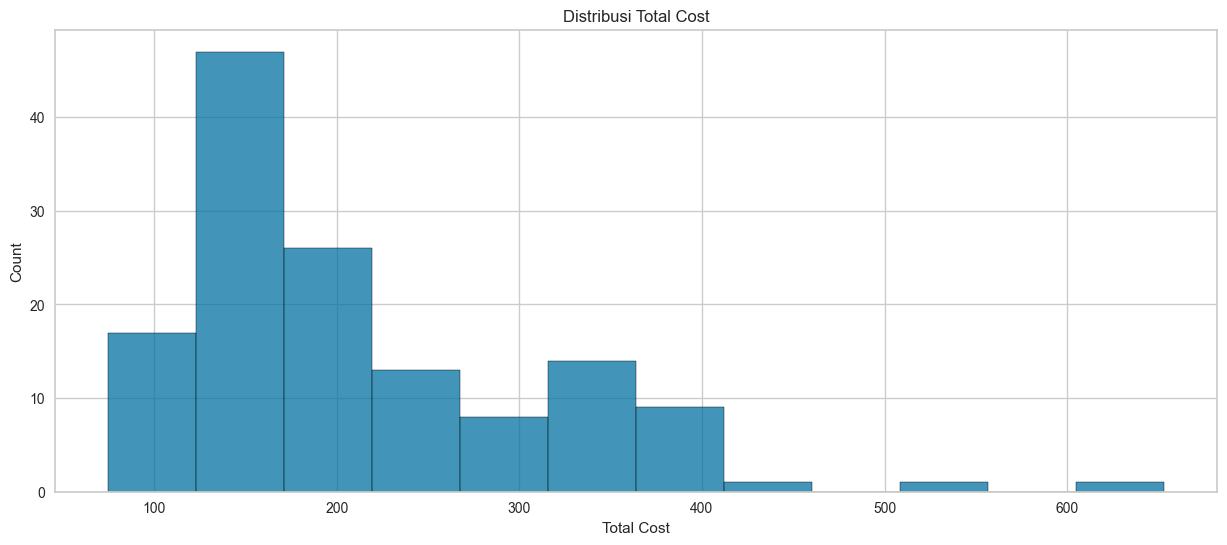

In [73]:
# cheking total biaya
plt.figure(figsize=(15,6))
sns.histplot(data_analyz['Total Cost'])
plt.title('Distribusi Total Cost')
plt.show()

Article dengan biaya hidup termahal  
https://finance.detik.com/berita-ekonomi-bisnis/d-7296915/10-negara-dengan-biaya-hidup-termahal-dunia-sebulan-perlu-duit-segini

article tersebut menjelaskan beberapa outlier mungkin memiliki alasan yang sah untuk keberadaannya dan mungkin mencerminkan variabilitas yang sebenarnya dalam data

Jadi saya mengkategorikan berdasarkan nilai kuartil,percentil, atau iqr(lowerbound,upperbound)

note: saya sedikit abstract dalam memahami konsep Uang tersebut



In [74]:
# Kategorikan biaya hidup

# # get variable sum
# total_summary = total_summary = data_analyz['total_biaya'].describe()
# # get variable qurtile
# Q1_total = total_summary['25%']
# Q3_total = total_summary['75%']


# # Mendefinisikan fungsi untuk mengkategorikan total
# def categorize_total(total_biaya):
#     if total_biaya < Q1_total:
#         return "Murah"
#     elif total_biaya < Q3_total:
#         return "terjangkau"
#     else:
#         return "Mahal"

# # buat kolom data kategori
# data_analyz['total_category'] = data_analyz['total_biaya'].apply(categorize_total)
# data_analyz


# pake percentile

# Hitung persentil
percentiles = data_analyz['Total Cost'].quantile([0.25, 0.5, 0.75])

# Tentukan batas persentil untuk setiap kategori
cheap_threshold = percentiles[0.25]
affordable_threshold = percentiles[0.5]
moderate_threshold = percentiles[0.75]

# Kategorikan total biaya hidup berdasarkan persentil
def categorize_total(total):
    if total < cheap_threshold:
        return "Murah"
    elif total < affordable_threshold:
        return "Terjangkau"
    elif total < moderate_threshold:
        return "Sedang"
    else:
        return "Mahal"

# Terapkan fungsi kategorisasi pada setiap total biaya hidup
data_analyz['Cost Category'] = data_analyz['Total Cost'].apply(categorize_total)

# Tampilkan DataFrame dengan kategori biaya hidup
data_analyz



Country Country code    Continental Region  Cost of Living Index  \
0    Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
1        Albania           AL        EASTERN EUROPE                 35.50   
2        Algeria           DZ       NORTHERN AFRICA                 26.87   
3      Argentina           AR         SOUTH AMERICA                 34.69   
4        Armenia           AM     CIS (FORMER USSR)                 33.89   
..           ...          ...                   ...                   ...   
132      Uruguay           UY         SOUTH AMERICA                 52.07   
133   Uzbekistan           UZ     CIS (FORMER USSR)                 27.31   
134      Vietnam           VN  ASIA (EX. NEAR EAST)                 37.48   
135        Yemen           YE             NEAR EAST                 53.14   
136       Zambia           ZM    SUB-SAHARAN AFRICA                 33.04   

     Rent Index  Groceries Index  Restaurant Price Index  \
0          2.72            14.92                   12.41   
1          8.47            29.32                   25.82   
2          4.59            28.82                   14.48   
3          7.71            28.17                   33.32   
4         11.61            27.59                   30.55   
..          ...              ...                     ...   
132       13.93            44.01                   49.39   
133        9.29            26.83                   24.22   
134       13.22            38.70                   19.98   
135        6.71            67.12                   24.74   
136        9.26            31.53                   22.46   

     Local Purchasing Power Index  Number of Internet Plans  \
0                           23.04                      35.0   
1                           30.19                      32.0   
2                           24.63                      20.0   
3                           30.72                      28.0   
4                           28.86                      21.0   
..                            ...                       ...   
132                         30.07                      35.0   
133                         22.37                      60.0   
134                         29.38                      46.0   
135                         14.41                      17.0   
136                         40.33                      60.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                           1.02                          0.38   
1                           2.80                          0.72   
2                           0.51                          0.16   
3                           2.38                          0.44   
4                           0.76                          0.22   
..                           ...                           ...   
132                         1.51                          0.10   
133                         0.60                          0.01   
134                         0.49                          0.07   
135                        15.98                          0.40   
136                         1.13                          0.01   

     Most Expensive Price per 1GB (USD) Internet Users  Population  \
0                                  2.12      4,068,194  37,171,921   
1                                 96.39      2,105,339   2,882,740   
2                                  2.24     26,350,000  42,228,408   
3                                 11.47     33,561,876  44,361,150   
4                                 13.02      2,043,110   2,951,745   
..                                  ...            ...         ...   
132                                6.33      2,360,269   3,449,285   
133                               23.75     16,692,456  32,476,244   
134                                5.55     68,172,134  95,545,962   
135                               39.94      7,548,512  28,498,683   
136                                6.80    

<Figure size 800x550 with 0 Axes>

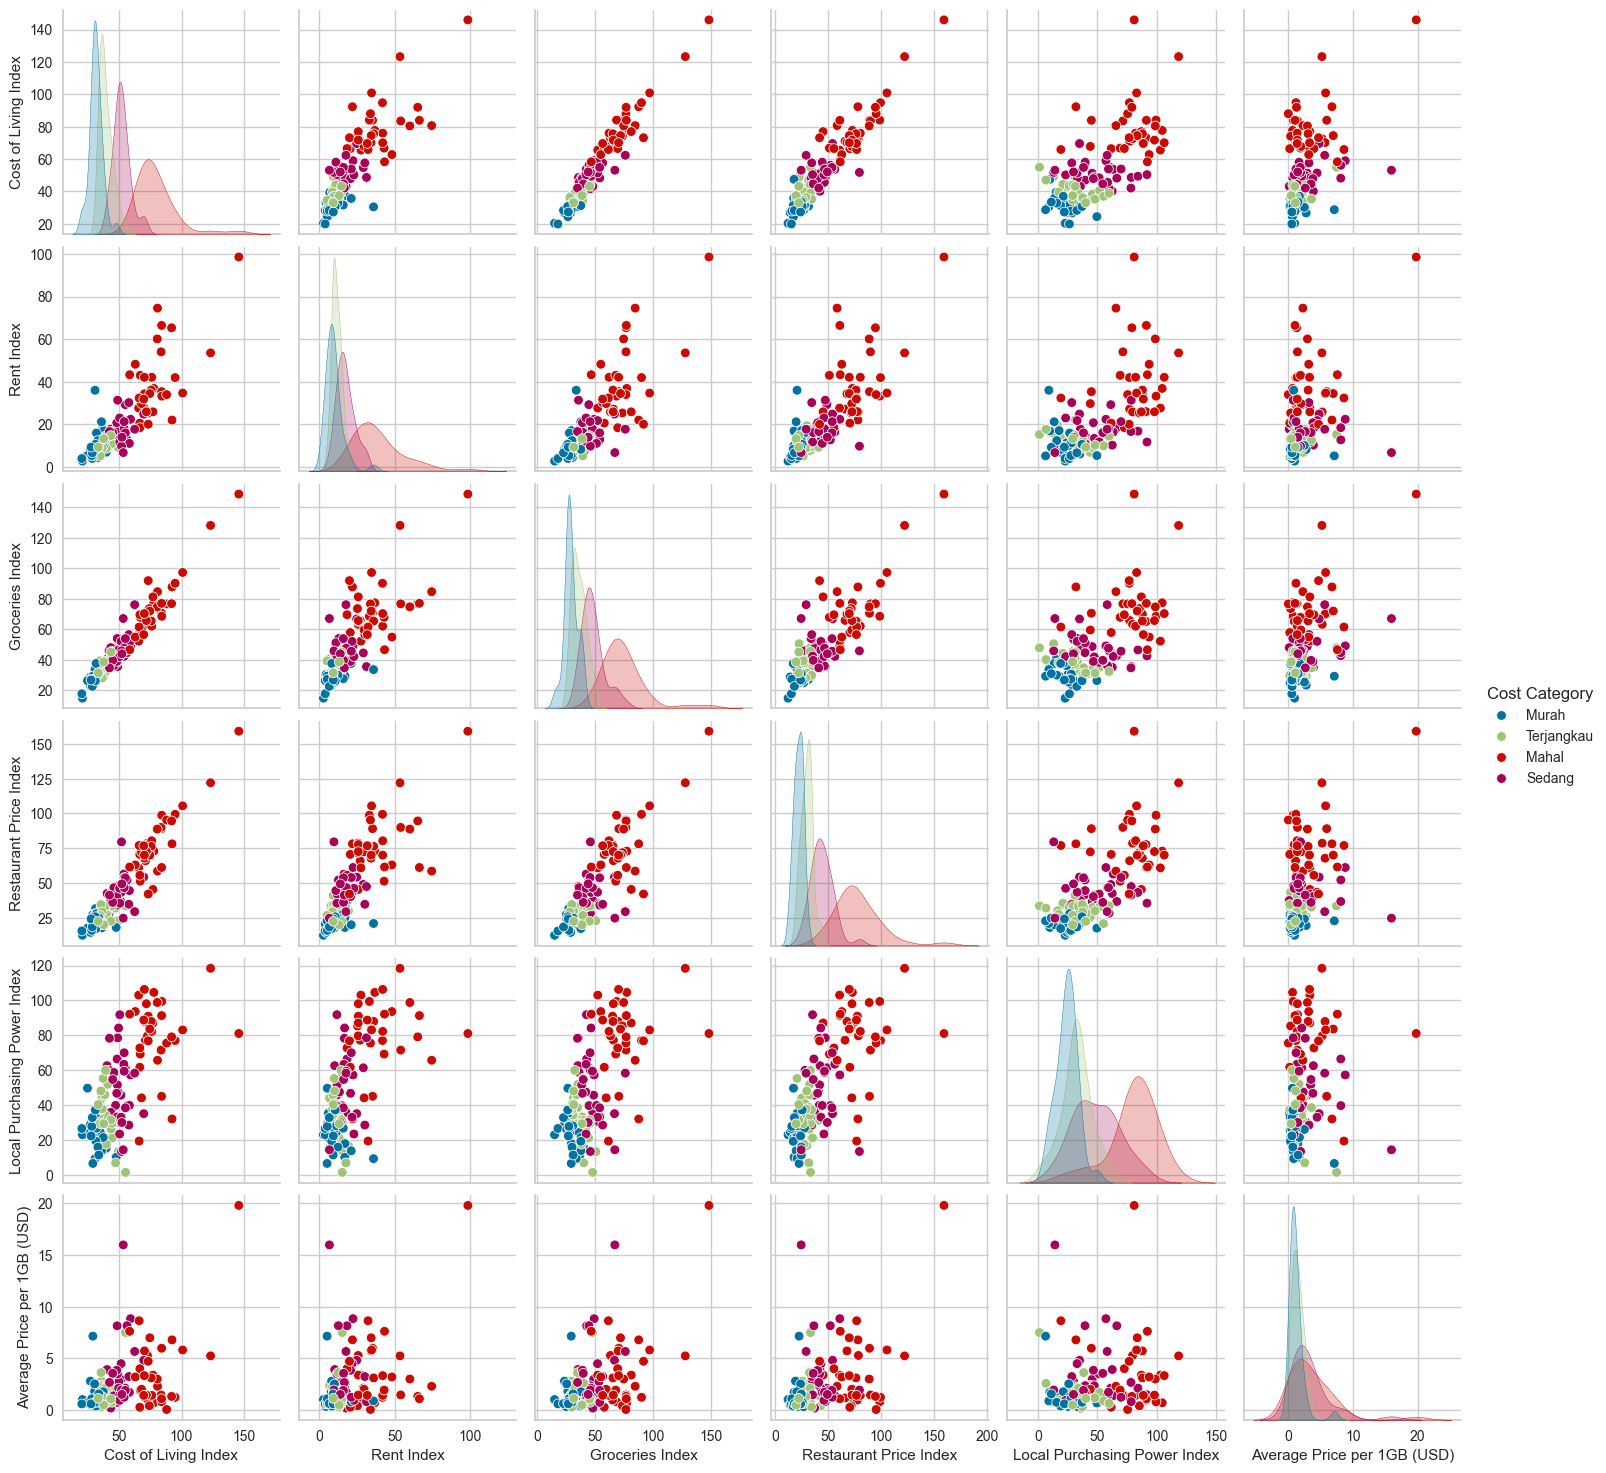

In [75]:
# checking distribution selected feature
to_Plot = ['Cost of Living Index','Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index','Average Price per 1GB (USD)', 'Cost Category']
plt.figure()
sns.pairplot(data_analyz[to_Plot], hue='Cost Category')  
#Taking hue 
plt.show()


Hasil visualisasi dapat di simpulkan sebagai berikut:
- Adanya outlier sehingga harus di handling
- Multicolynearity atau adanya hubungan linear antar faeture
- seperti disebutkan di awal samakin tinggi nilai di feature semakin mahal biaya hidup


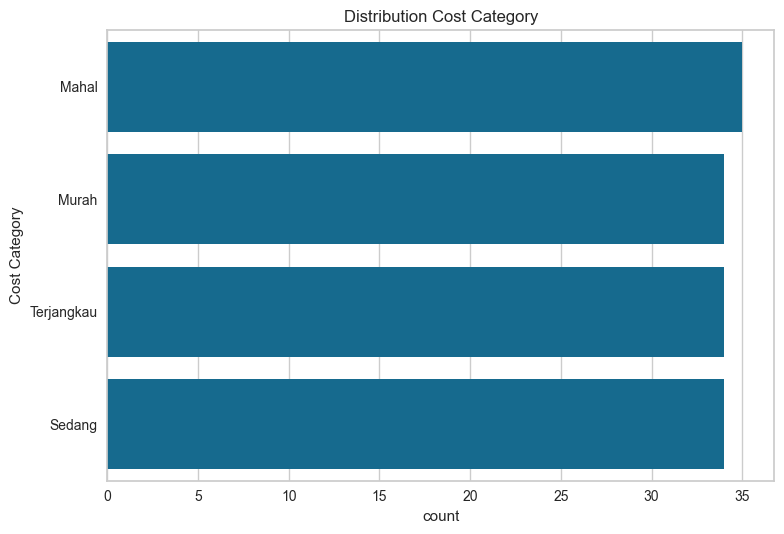

In [76]:
# Distribusi cost category
plt.figure()

sns.countplot(data_analyz['Cost Category'], order=data_analyz['Cost Category'].value_counts().index)
plt.title('Distribution Cost Category')
plt.tight_layout()
plt.show()

Dari output di hasilkan bahawa distribusi uniform

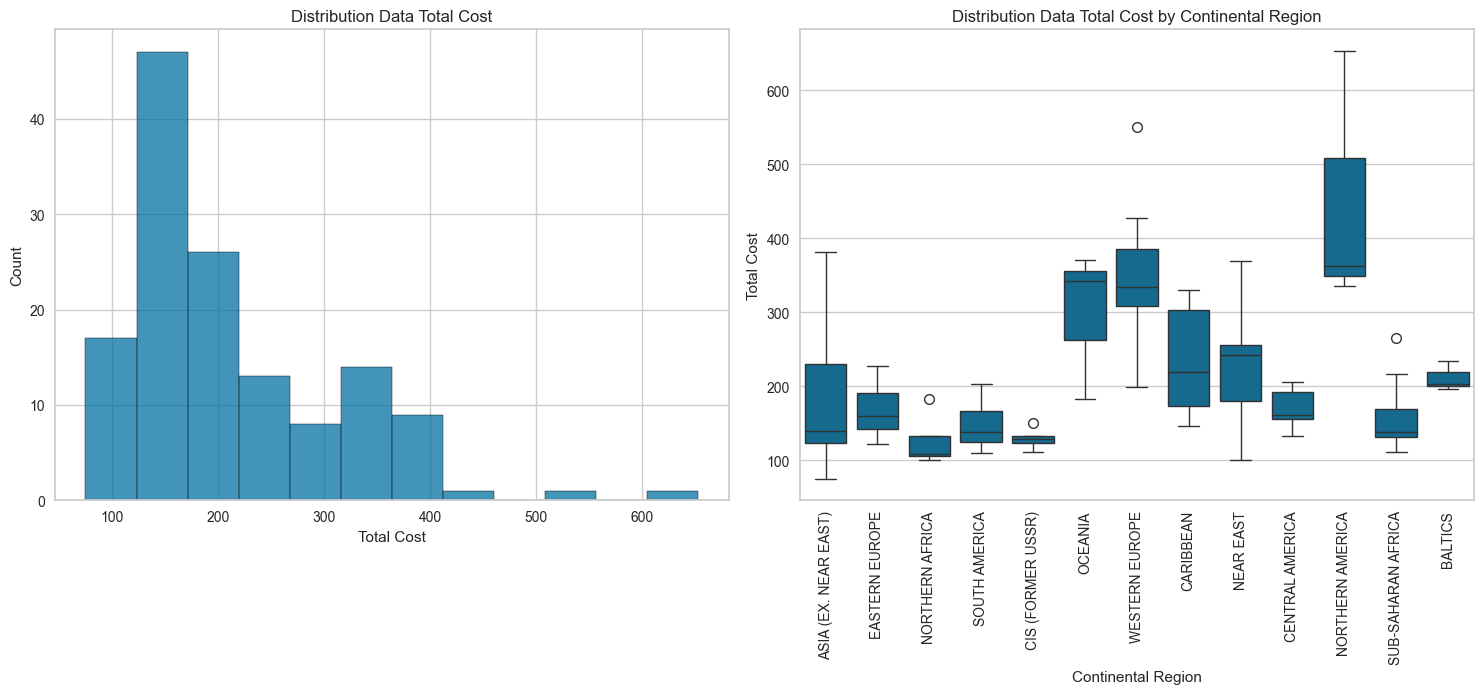

In [77]:
# Checking Distribution Berdasrkan Cotinental Region

# figure
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.histplot(x='Total Cost', data=data_analyz)
plt.title('Distribution Data Total Cost')

plt.subplot(2,2,2)
sns.boxplot(x='Continental Region', y='Total Cost', data=data_analyz)
plt.title('Distribution Data Total Cost by Continental Region')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

Dari hasil visualisasi Total cost berdasarkan Region Continental menunjukkan bahwa `CIS(FORMER USSR)`,` South America` dan `Northen Africa `yang memiliki  biaya hidup rendah berdasarkan rata-rata dibandingkan dengan continental region lain.

In [78]:
# Melakukan agregate Total Cost berdasrkan Continental Region
grouped_data = data_analyz.groupby('Continental Region')['Total Cost'].mean()
sorted_grouped_data = grouped_data.sort_values()

top_3_min = sorted_grouped_data.head(3)
top_3_min

Continental Region
NORTHERN AFRICA      126.13000
CIS (FORMER USSR)    128.45625
SOUTH AMERICA        146.43900
Name: Total Cost, dtype: float64

Saya juga melakukan agregat untuk memastikan biaya (USD)

In [79]:
sorted_grouped_data

Continental Region
NORTHERN AFRICA         126.130000
CIS (FORMER USSR)       128.456250
SOUTH AMERICA           146.439000
SUB-SAHARAN AFRICA      154.667500
EASTERN EUROPE          166.445000
CENTRAL AMERICA         169.271250
ASIA (EX. NEAR EAST)    182.531739
BALTICS                 211.016667
NEAR EAST               228.133125
CARIBBEAN               235.524286
OCEANIA                 298.146667
WESTERN EUROPE          339.675238
NORTHERN AMERICA        450.583333
Name: Total Cost, dtype: float64

In [80]:
cis_formerUSSR = data_analyz[data_analyz['Continental Region'] == 'CIS (FORMER USSR)']
cis_formerUSSR.sort_values(by='Total Cost')

Country Country code Continental Region  Cost of Living Index  \
133  Uzbekistan           UZ  CIS (FORMER USSR)                 27.31   
7    Azerbaijan           AZ  CIS (FORMER USSR)                 29.73   
64   Kazakhstan           KZ  CIS (FORMER USSR)                 28.68   
42      Georgia           GE  CIS (FORMER USSR)                 30.18   
128     Ukraine           UA  CIS (FORMER USSR)                 30.71   
12      Belarus           BY  CIS (FORMER USSR)                 30.89   
4       Armenia           AM  CIS (FORMER USSR)                 33.89   
103      Russia           RU  CIS (FORMER USSR)                 35.26   

     Rent Index  Groceries Index  Restaurant Price Index  \
133        9.29            26.83                   24.22   
7          7.86            26.57                   26.73   
64         9.44            25.35                   27.24   
42         9.26            26.44                   27.88   
128       10.57            26.30                   25.75   
12         9.81            27.24                   31.64   
4         11.61            27.59                   30.55   
103       13.09            29.86                   34.56   

     Local Purchasing Power Index  Number of Internet Plans  \
133                         22.37                      60.0   
7                           27.26                      42.0   
64                          32.23                      19.0   
42                          31.15                      20.0   
128                         37.22                      19.0   
12                          31.78                      14.0   
4                           28.86                      21.0   
103                         37.41                      22.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
133                         0.60                          0.01   
7                           1.82                          0.24   
64                          0.59                          0.25   
42                          1.80                          0.30   
128                         0.75                          0.14   
12                          0.43                          0.02   
4                           0.76                          0.22   
103                         0.29                          0.13   

     Most Expensive Price per 1GB (USD) Internet Users   Population  \
133                               23.75     16,692,456   32,476,244   
7                                  9.80      7,763,795    9,949,537   
64                                 2.35     13,913,699   18,319,618   
42                                 7.98      3,446,533    4,002,942   
128                               35.88     31,100,000   44,246,156   
12                                16.62      7,048,231    9,452,617   
4                                 13.02      2,043,110    2,951,745   
103                                1.86    124,000,000  145,734,038   

     Total Cost Cost Category  
133      110.62         Murah  
7        119.97         Murah  
64       123.53         Murah  
42       126.71         Murah  
128      131.30         Murah  
12       131.79         Murah  
4        133.26    Terjangkau  
103      150.47    Terjangkau

In [81]:
south_America = data_analyz[data_analyz['Continental Region'] == 'SOUTH AMERICA']
south_America.sort_values(by='Total Cost')

Country Country code Continental Region  Cost of Living Index  \
26    Colombia           CO      SOUTH AMERICA                 26.72   
95    Paraguay           PY      SOUTH AMERICA                 30.20   
19      Brazil           BR      SOUTH AMERICA                 33.24   
96        Peru           PE      SOUTH AMERICA                 32.53   
3    Argentina           AR      SOUTH AMERICA                 34.69   
16     Bolivia           BO      SOUTH AMERICA                 34.77   
34     Ecuador           EC      SOUTH AMERICA                 37.34   
24       Chile           CL      SOUTH AMERICA                 43.90   
132    Uruguay           UY      SOUTH AMERICA                 52.07   
117   Suriname           SR      SOUTH AMERICA                 51.78   

     Rent Index  Groceries Index  Restaurant Price Index  \
26         8.18            23.47                   19.44   
95        10.04            25.45                   24.19   
19         8.27            28.16                   25.24   
96        11.22            30.71                   21.53   
3          7.71            28.17                   33.32   
16        10.18            31.26                   24.97   
34        11.28            34.49                   28.55   
24        13.51            38.87                   43.26   
132       13.93            44.01                   49.39   
117        9.71            45.92                   79.61   

     Local Purchasing Power Index  Number of Internet Plans  \
26                          28.85                      60.0   
95                          26.08                      27.0   
19                          27.85                      58.0   
96                          28.17                      49.0   
3                           30.72                      28.0   
16                          36.04                      48.0   
34                          31.76                      19.0   
24                          33.27                      59.0   
132                         30.07                      35.0   
117                         13.44                      12.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
26                          2.80                          0.42   
95                          2.53                          0.73   
19                          0.92                          0.18   
96                          1.15                          0.85   
3                           2.38                          0.44   
16                          2.18                          0.87   
34                          1.06                          0.63   
24                          0.39                          0.24   
132                         1.51                          0.10   
117                         1.94                          1.72   

     Most Expensive Price per 1GB (USD) Internet Users   Population  \
26                                 9.88     30,548,252   49,661,048   
95                                 9.12      4,160,340    6,956,066   
19                                 2.72    160,010,801  209,469,323   
96                                15.58     15,674,241   31,989,260   
3                                 11.47     33,561,876   44,361,150   
16                                14.44      4,843,916   11,353,142   
34                                 3.00      9,521,056   17,084,358   
24                                 1.83     14,864,456   18,729,160   
132                                6.33      2,360,269    3,449,285   
117                                2.73        275,785      575,990   

     Total Cost Cost Category  
26       109.46         Murah  
95       118.49         Murah  
19       123.68         Murah  
96       125.31         Murah  
3        136.99    Terjangkau  
16       139.40    Terjangkau  
34       144.48    Terjangkau  
24       173.20    Terjangkau  
132      190.98        Sedang  
117      202.40        Sedang

In [82]:
northen_Africa = data_analyz[data_analyz['Continental Region'] == 'NORTHERN AFRICA']
northen_Africa.sort_values(by='Total Cost')

Country Country code Continental Region  Cost of Living Index  \
2    Algeria           DZ    NORTHERN AFRICA                 26.87   
125  Tunisia           TN    NORTHERN AFRICA                 27.87   
35     Egypt           EG    NORTHERN AFRICA                 29.52   
82   Morocco           MA    NORTHERN AFRICA                 33.83   
70     Libya           LY    NORTHERN AFRICA                 48.35   

     Rent Index  Groceries Index  Restaurant Price Index  \
2          4.59            28.82                   14.48   
125        5.32            27.36                   15.96   
35         5.82            27.42                   23.42   
82         8.98            30.63                   24.52   
70        12.89            54.03                   34.10   

     Local Purchasing Power Index  Number of Internet Plans  \
2                           24.63                      20.0   
125                         27.83                      25.0   
35                          21.54                      40.0   
82                          34.36                      24.0   
70                          33.25                      16.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
2                           0.51                          0.16   
125                         1.09                          0.33   
35                          1.04                          0.02   
82                          0.88                          0.44   
70                          0.74                          0.00   

     Most Expensive Price per 1GB (USD) Internet Users  Population  \
2                                  2.24     26,350,000  42,228,408   
125                                3.63      6,400,330  11,565,201   
35                                 2.38     54,740,141  98,423,598   
82                                 5.50     22,072,765  36,029,093   
70                                 2.22      1,387,116   6,678,559   

     Total Cost Cost Category  
2         99.90         Murah  
125      105.43         Murah  
35       108.76         Murah  
82       133.20    Terjangkau  
70       183.36        Sedang

Conclusions:

Dari hasil Exploratory data dapat saya simpulkan sebagai berikut:

- Saya melakukan agregate dengan menjumlahkan variable yang berhubungan dengan kenaikan dan penurunan untuk menentukan Total cost (biaya hidup di suatu negara). Berdasarkan agregat saya menemukan biaya hidup paling murah yaitu `$51` dan paling mahal `$670` dengan rata-rata biaya hidup di suatu negara adalah `$207`

- Dari hasil penjumlahan Total cost di kategorikan lagi menjadi `murah`,`terjangkau`, `sedang` dan `mahal`. Dari ditribusi data bedasarkan visualisasi ada nya outlier dan multicolynearity antar feature. yaitu korelasi semakin tinggi nilai di suatu feature maka biaya hidup akan mahal

- Dan untuk menjawab pertanyaan median Continental Region adalah Asia sehingga menimbulkan pertanyaan apakah negara-negara asia memiliki biaya hidup murah?.
Saya keliru median bukan berarti biaya hidup murah dan kenyaman bisa di lihat dari berbagai faktor sehingga tidak bisa terjawab untuk sekarang

- Dari hasil visualisasi Total cost berdasarkan Region Continental menunjukkan bahwa `Northen Africa`,`CIS(FORMER USSR)`dan `South America` yang memiliki  biaya hidup rendah berdasarkan rata-rata dibandingkan dengan continental region lain. dan saya juga membuat subset data tersebut.

- Dari hasil subset data dapat disimpulkan Negara biaya hidup murah berdasarkan continental region tabel di bawah ini:

Continental Region | Nama Negara | Biaya Hidup 
--- | --- | ---
Northen Africa | Algeria | $99.90 (USD)
CIS(FORMER USSR) | Uzbekistan | $110.62 (USD)
South America | Colombia | $109.46 (USD)



---

# v. Feature Engineering

In [83]:
# Copy dataframe agar tidak mengulang jika salah
data = df.copy()
data.head()

Country Country code    Continental Region  Cost of Living Index  \
0  Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
1      Albania           AL        EASTERN EUROPE                 35.50   
2      Algeria           DZ       NORTHERN AFRICA                 26.87   
3    Argentina           AR         SOUTH AMERICA                 34.69   
4      Armenia           AM     CIS (FORMER USSR)                 33.89   

   Rent Index  Groceries Index  Restaurant Price Index  \
0        2.72            14.92                   12.41   
1        8.47            29.32                   25.82   
2        4.59            28.82                   14.48   
3        7.71            28.17                   33.32   
4       11.61            27.59                   30.55   

   Local Purchasing Power Index  Number of Internet Plans  \
0                         23.04                      35.0   
1                         30.19                      32.0   
2                         24.63                      20.0   
3                         30.72                      28.0   
4                         28.86                      21.0   

   Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                         1.02                          0.38   
1                         2.80                          0.72   
2                         0.51                          0.16   
3                         2.38                          0.44   
4                         0.76                          0.22   

   Most Expensive Price per 1GB (USD) Internet Users  Population  
0                                2.12      4,068,194  37,171,921  
1                               96.39      2,105,339   2,882,740  
2                                2.24     26,350,000  42,228,408  
3                               11.47     33,561,876  44,361,150  
4                               13.02      2,043,110   2,951,745

In [84]:
# Cek data duplikat
data.duplicated().sum()

1

Satu data terduplikat sehingga harus drop

In [85]:
data.drop_duplicates(inplace=True)

In [86]:
data.duplicated().sum()

0

### Data Cleaning

In [87]:
# clean data Internet Users dan Population
data['Internet Users'] = data['Internet Users'].str.replace(',', '').str.strip()
data['Population'] = data['Population'].str.replace(',', '').str.strip()
# konversi ke tipe data float 
data['Internet Users'] = data['Internet Users'].astype(float)
data['Population'] = data['Population'].astype(float)

print(data[['Internet Users', 'Population']].dtypes)

Internet Users    float64
Population        float64
dtype: object


Data dibersihkan dan diuah tipe data yang sesuai. selanjutnya cek missing value

In [88]:
data

Country Country code    Continental Region  Cost of Living Index  \
0    Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
1        Albania           AL        EASTERN EUROPE                 35.50   
2        Algeria           DZ       NORTHERN AFRICA                 26.87   
3      Argentina           AR         SOUTH AMERICA                 34.69   
4        Armenia           AM     CIS (FORMER USSR)                 33.89   
..           ...          ...                   ...                   ...   
132      Uruguay           UY         SOUTH AMERICA                 52.07   
133   Uzbekistan           UZ     CIS (FORMER USSR)                 27.31   
134      Vietnam           VN  ASIA (EX. NEAR EAST)                 37.48   
135        Yemen           YE             NEAR EAST                 53.14   
136       Zambia           ZM    SUB-SAHARAN AFRICA                 33.04   

     Rent Index  Groceries Index  Restaurant Price Index  \
0          2.72            14.92                   12.41   
1          8.47            29.32                   25.82   
2          4.59            28.82                   14.48   
3          7.71            28.17                   33.32   
4         11.61            27.59                   30.55   
..          ...              ...                     ...   
132       13.93            44.01                   49.39   
133        9.29            26.83                   24.22   
134       13.22            38.70                   19.98   
135        6.71            67.12                   24.74   
136        9.26            31.53                   22.46   

     Local Purchasing Power Index  Number of Internet Plans  \
0                           23.04                      35.0   
1                           30.19                      32.0   
2                           24.63                      20.0   
3                           30.72                      28.0   
4                           28.86                      21.0   
..                            ...                       ...   
132                         30.07                      35.0   
133                         22.37                      60.0   
134                         29.38                      46.0   
135                         14.41                      17.0   
136                         40.33                      60.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                           1.02                          0.38   
1                           2.80                          0.72   
2                           0.51                          0.16   
3                           2.38                          0.44   
4                           0.76                          0.22   
..                           ...                           ...   
132                         1.51                          0.10   
133                         0.60                          0.01   
134                         0.49                          0.07   
135                        15.98                          0.40   
136                         1.13                          0.01   

     Most Expensive Price per 1GB (USD)  Internet Users  Population  
0                                  2.12       4068194.0  37171921.0  
1                                 96.39       2105339.0   2882740.0  
2                                  2.24      26350000.0  42228408.0  
3                                 11.47      33561876.0  44361150.0  
4                                 13.02       2043110.0   2951745.0  
..                                  ...             ...         ...  
132                                6.33       2360269.0   3449285.0  
133                               23.75      16692456.0  32476244.0  
134                                5.55      68172134.0  95545962.0  
135                               39.94       7548512.0  28498683.0  
136                                6.80    

### Checking and Handling Missing Value

In [89]:
data.isnull().sum()

Country                               0
Country code                          0
Continental Region                    0
Cost of Living Index                  0
Rent Index                            0
Groceries Index                       0
Restaurant Price Index                0
Local Purchasing Power Index          0
Number of Internet Plans              0
Average Price per 1GB (USD)           0
Cheapest Price per 1GB (USD)          0
Most Expensive Price per 1GB (USD)    0
Internet Users                        3
Population                            5
dtype: int64

In [90]:
data[data.isnull().any(axis=1)]

Country Country code    Continental Region  Cost of Living Index  \
47     Guernsey           GG        WESTERN EUROPE                 83.59   
62       Jersey           JE        WESTERN EUROPE                 92.02   
73        Macao           MO  ASIA (EX. NEAR EAST)                 66.81   
85  Netherlands           NL        WESTERN EUROPE                 75.66   
93    Palestine           PS             NEAR EAST                 58.11   

    Rent Index  Groceries Index  Restaurant Price Index  \
47       54.02            76.76                   89.98   
62       65.33            76.88                   94.65   
73       43.00            67.90                   51.32   
85       36.06            65.49                   76.35   
93       11.01            51.23                   44.58   

    Local Purchasing Power Index  Number of Internet Plans  \
47                         71.57                      14.0   
62                         79.14                      18.0   
73                         69.27                      19.0   
85                         87.99                      24.0   
93                         39.84                      17.0   

    Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
47                         1.46                          0.16   
62                         1.32                          0.54   
73                         1.93                          0.99   
85                         3.11                          0.77   
93                         1.71                          0.46   

    Most Expensive Price per 1GB (USD)  Internet Users  Population  
47                               54.84             NaN         NaN  
62                               17.14         38958.0         NaN  
73                                8.29             NaN         NaN  
85                               15.97             NaN         NaN  
93                                3.64       3208312.0         NaN

Dari hasil pengamatan saya bahwa nilai NaN adalah` "Missing Not at Random" (MNAR)`, karena suatu negara tidak tersedia informasinya. contoh palestina populasi kosong karena suatu konflik perang atau penjajahan. 

Dalam konteks objektive saya tidak akan merkomendasikan untuk di tinggali walaupun murah jadi saya hapus `(drop)`. perlu diperhatikan butuh explore lebih jauh jika memungkinkan untuk ditinggali.

In [91]:
# Drop Missing value
data.dropna(inplace=True)

<Axes: >

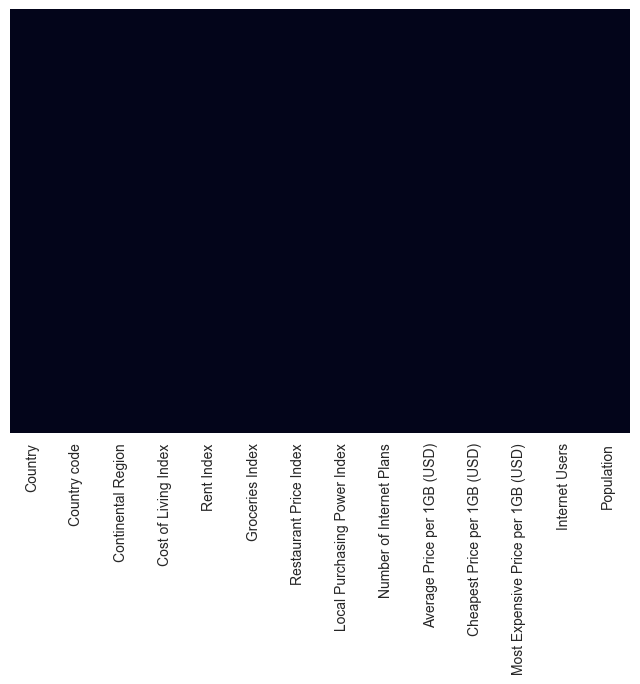

In [92]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False)

Missing value sudah drop data sudah bersih.

### Handling Outlier

Seperti penjelasan di atas adanya outlier sehingga harus di atasi, dalam hal ini saya menggunakan metode Winsorization.

Cara melakukannya adalah memfilter ditribusi normal dan tidak dengan menggunakan motode statistika skewnes dan menset threshold.
- Threshold untuk Distribusi Normal: 
Biasanya, nilai skewness yang mendekati nol (`misalnya, antara -0.5 hingga 0.5`) menunjukkan bahwa distribusi data cenderung normal. 
- Threshold untuk Distribusi Skewed:
Distribusi data dikatakan skewed jika nilai skewnessnya melebihi nilai ambang tertentu. Secara umum, `nilai skewness di atas 0.5 atau di bawah -0.5` sering digunakan sebagai indikator bahwa distribusi data tidak simetris dan cenderung skewed. 


In [93]:
# Filter Numerical Columns into Variable
num_cols = data.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
dataNum_normal = []
listCols_normal = []

# Making data and columns for skewed distribution
dataNum_skewed = []
listCols_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for cols in num_cols:
    skewness = data[cols].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        listCols_normal.append(cols)
        dataNum_normal.append([cols, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        listCols_skewed.append(cols)
        dataNum_skewed.append([cols, skewness])

In [94]:
# Showing skewed columns
data_normal = pd.DataFrame(data=dataNum_normal, columns=['kolom_normal', 'skewness'])
data_normal

kolom_normal  skewness
0  Number of Internet Plans  0.378603

In [95]:
# Showing skewed columns
data_skew = pd.DataFrame(data=dataNum_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

kolom_skewed  skewness
0                Cost of Living Index  1.548700
1                          Rent Index  2.418988
2                     Groceries Index  1.796119
3              Restaurant Price Index  1.654544
4        Local Purchasing Power Index  0.723933
5         Average Price per 1GB (USD)  3.214842
6        Cheapest Price per 1GB (USD)  2.771531
7  Most Expensive Price per 1GB (USD)  9.085735
8                      Internet Users  6.708637
9                          Population  6.965452

In [96]:
# # Input low variation columns into variable
# col_lowVarition = ['PerformanceRating']

# # Drop the low variation columns in skewed columns, and add it into normal distribution columns
# for kolom in col_lowVarition:
#     listCols_skewed.remove(kolom) #-> removing low variation columns in skewed columns
#     listCols_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [97]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming df
data_capped = winsorizer_normal_dist.fit_transform(data)

In [98]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
data_capped = winsorizer_skewed.fit_transform(data)

In [99]:
# # Capping Method for Normal Distribution  
# winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
#                             tail='both',
#                             fold=3,
#                             variables=kolom_low_variation,
#                             missing_values='ignore')

# # Fit & Transforming X_train 
# df_capped = winsorizer_normal_dist.fit_transform(df)

In [100]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

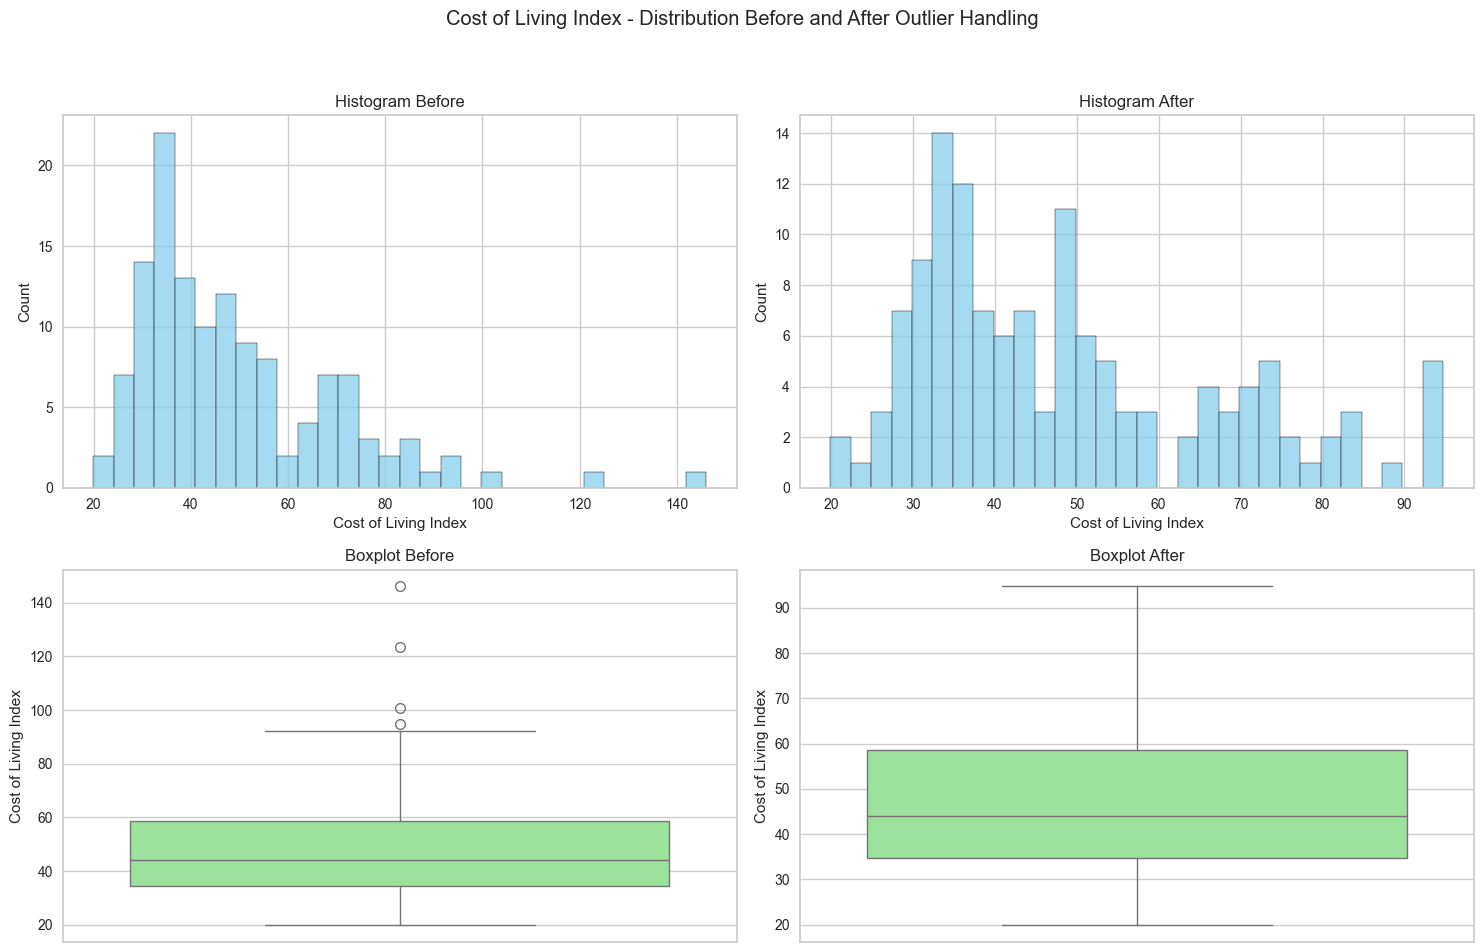

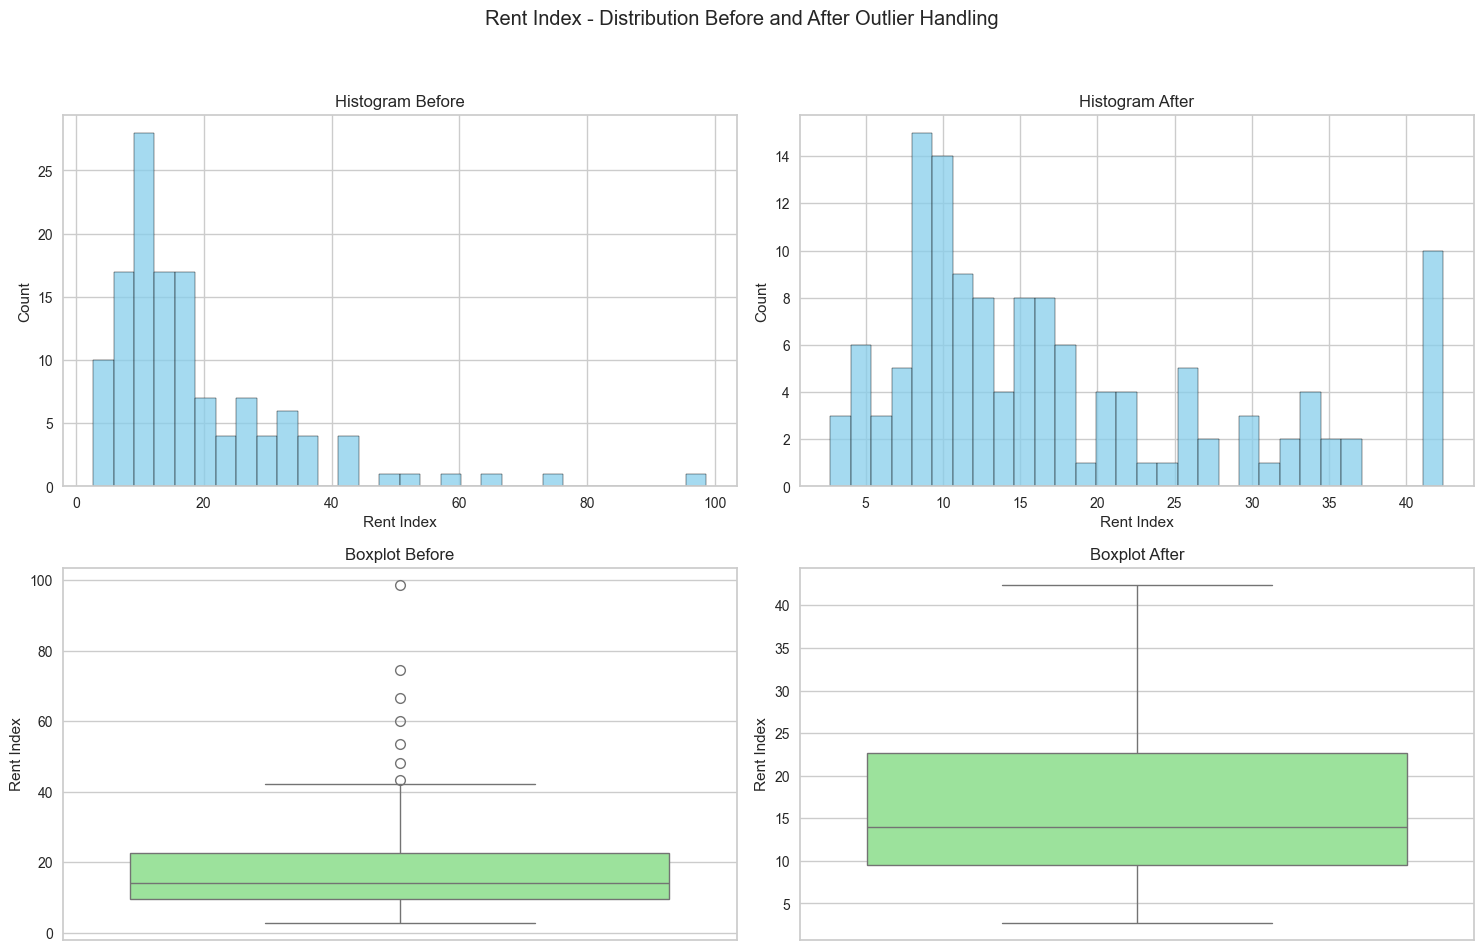

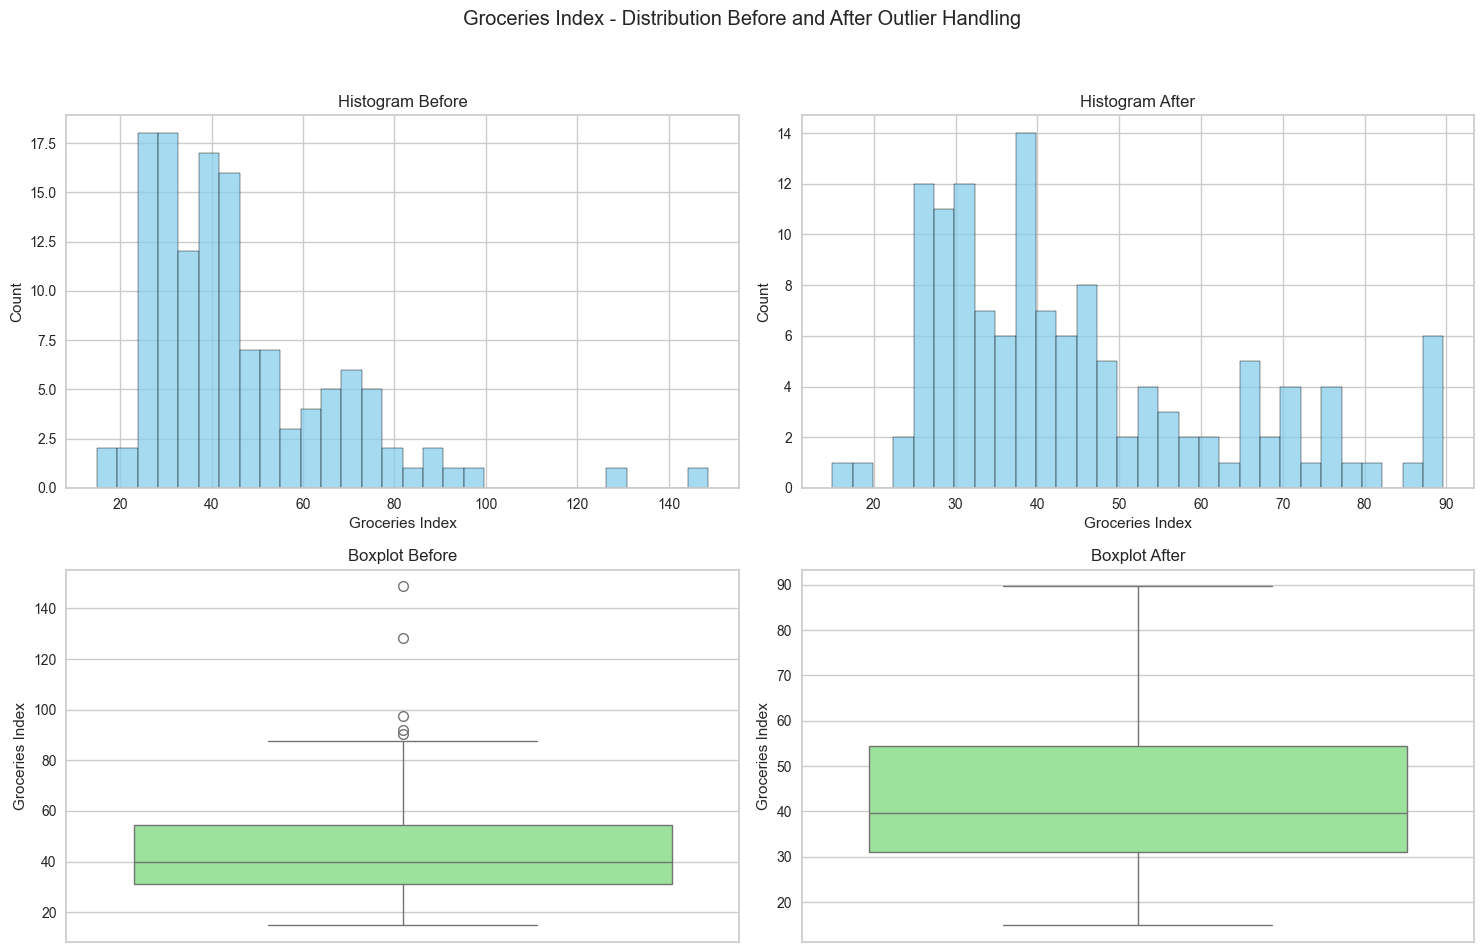

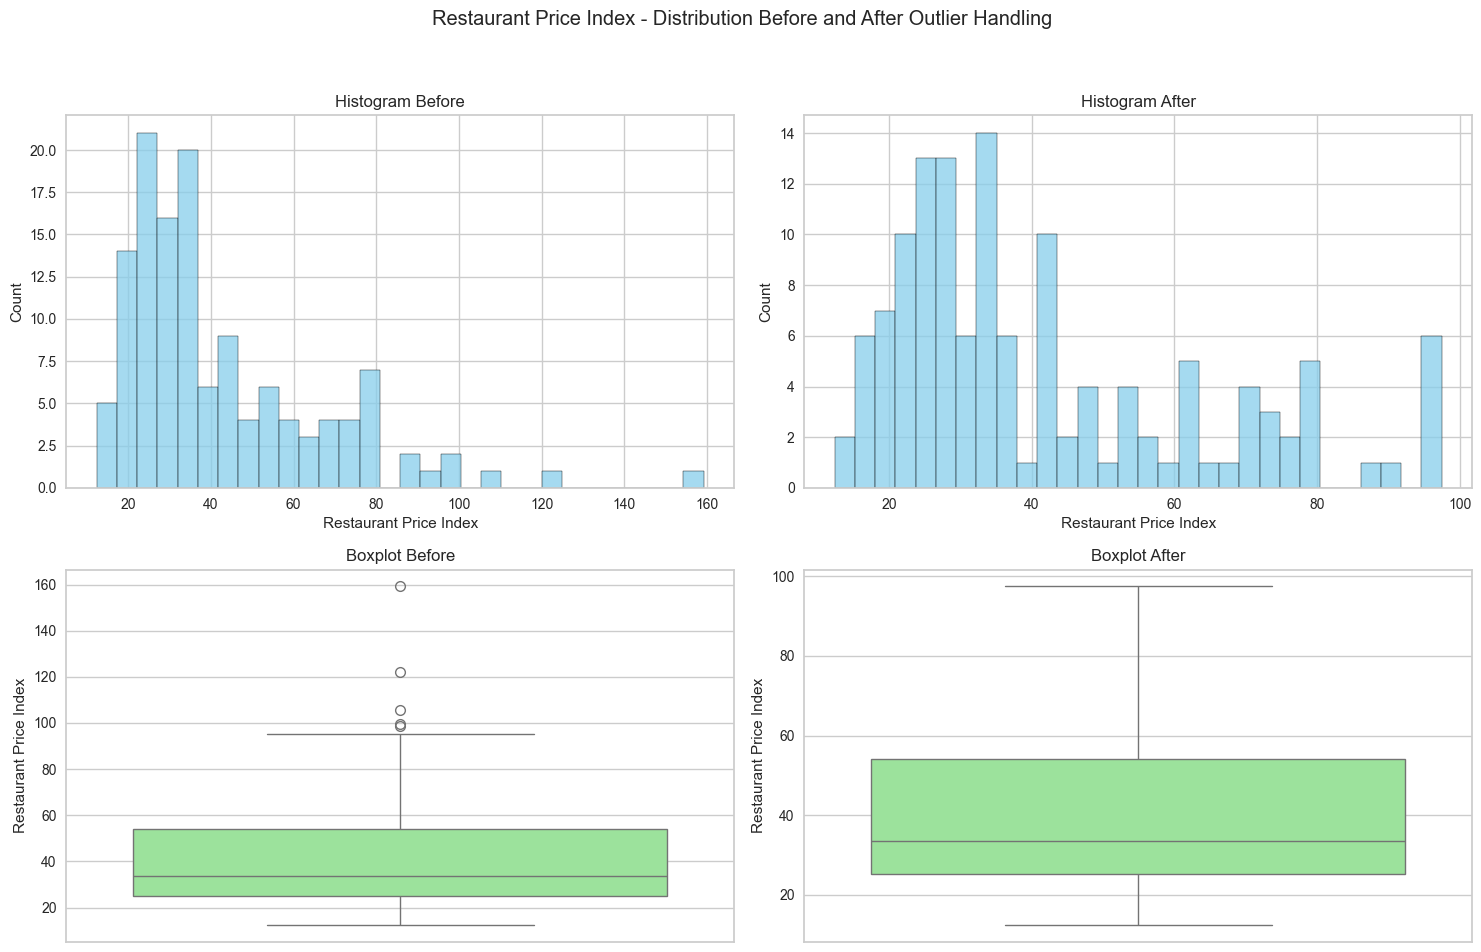

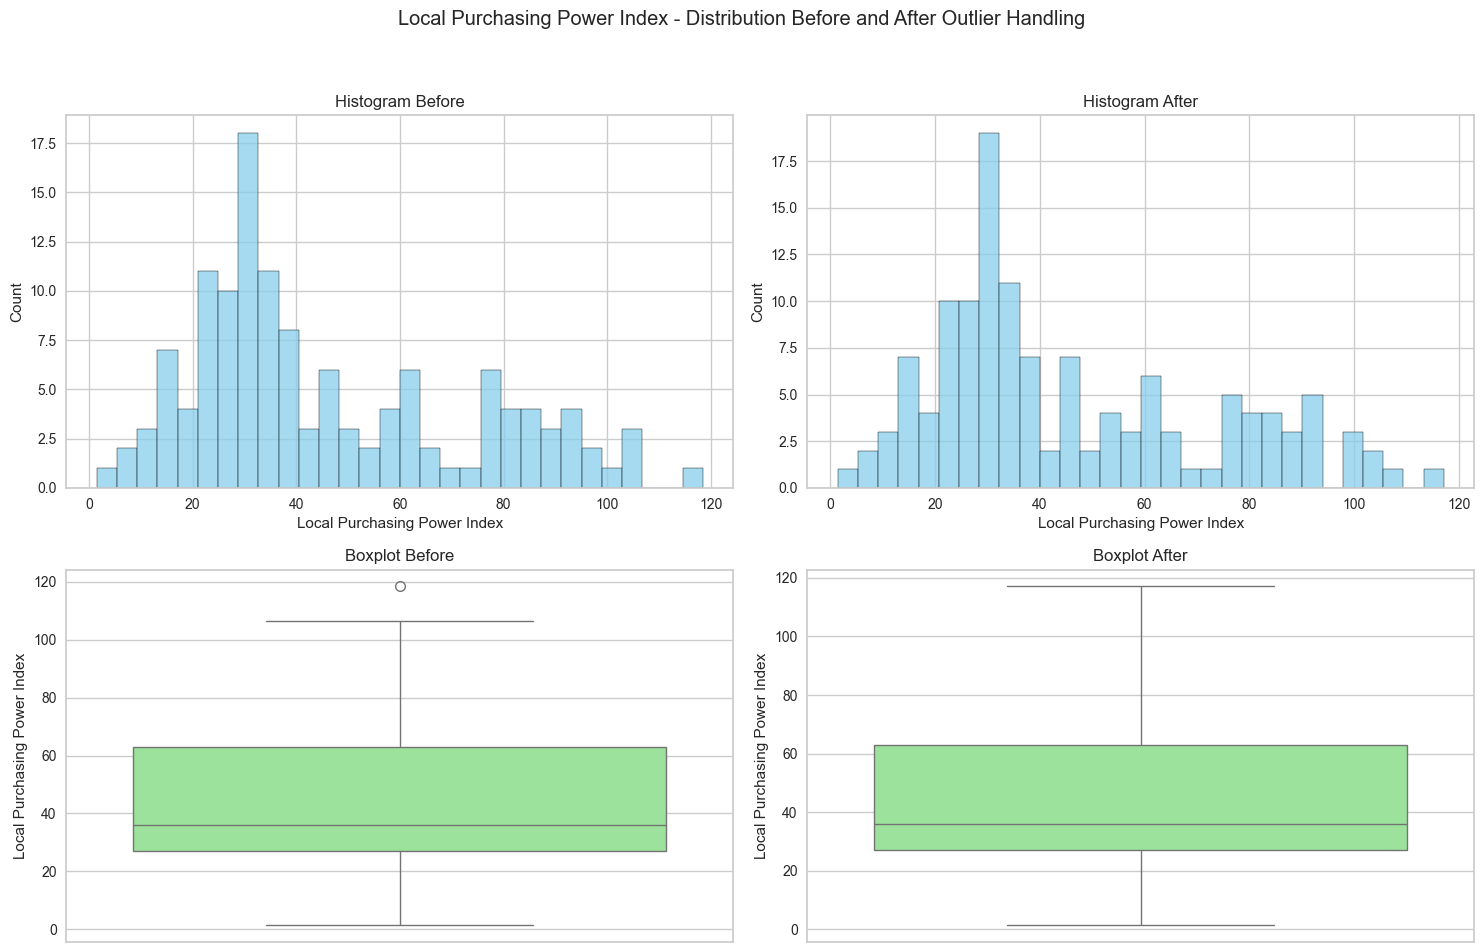

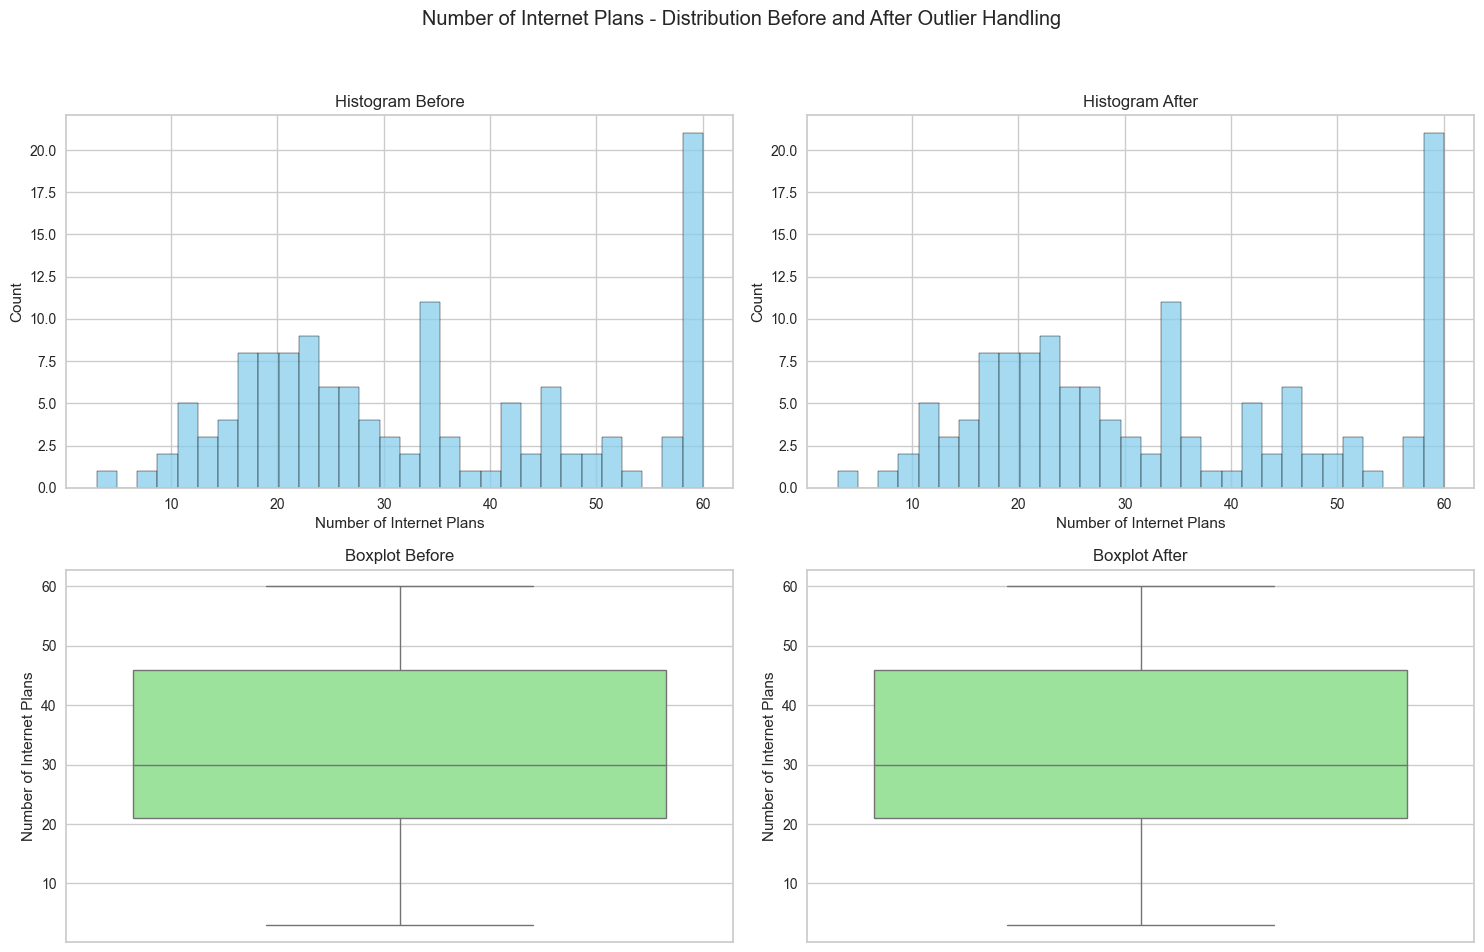

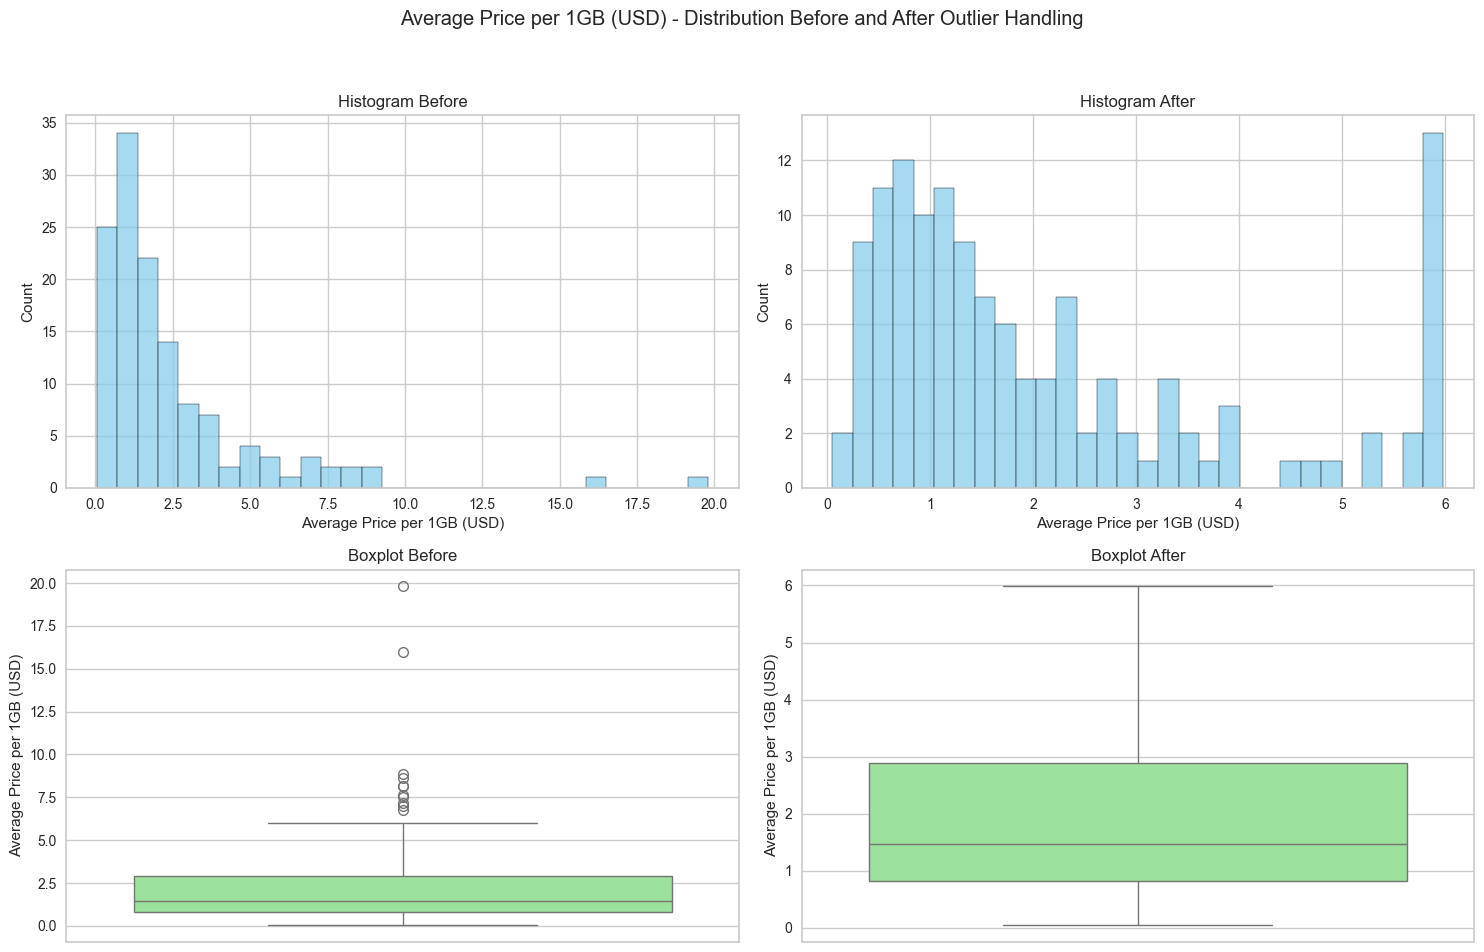

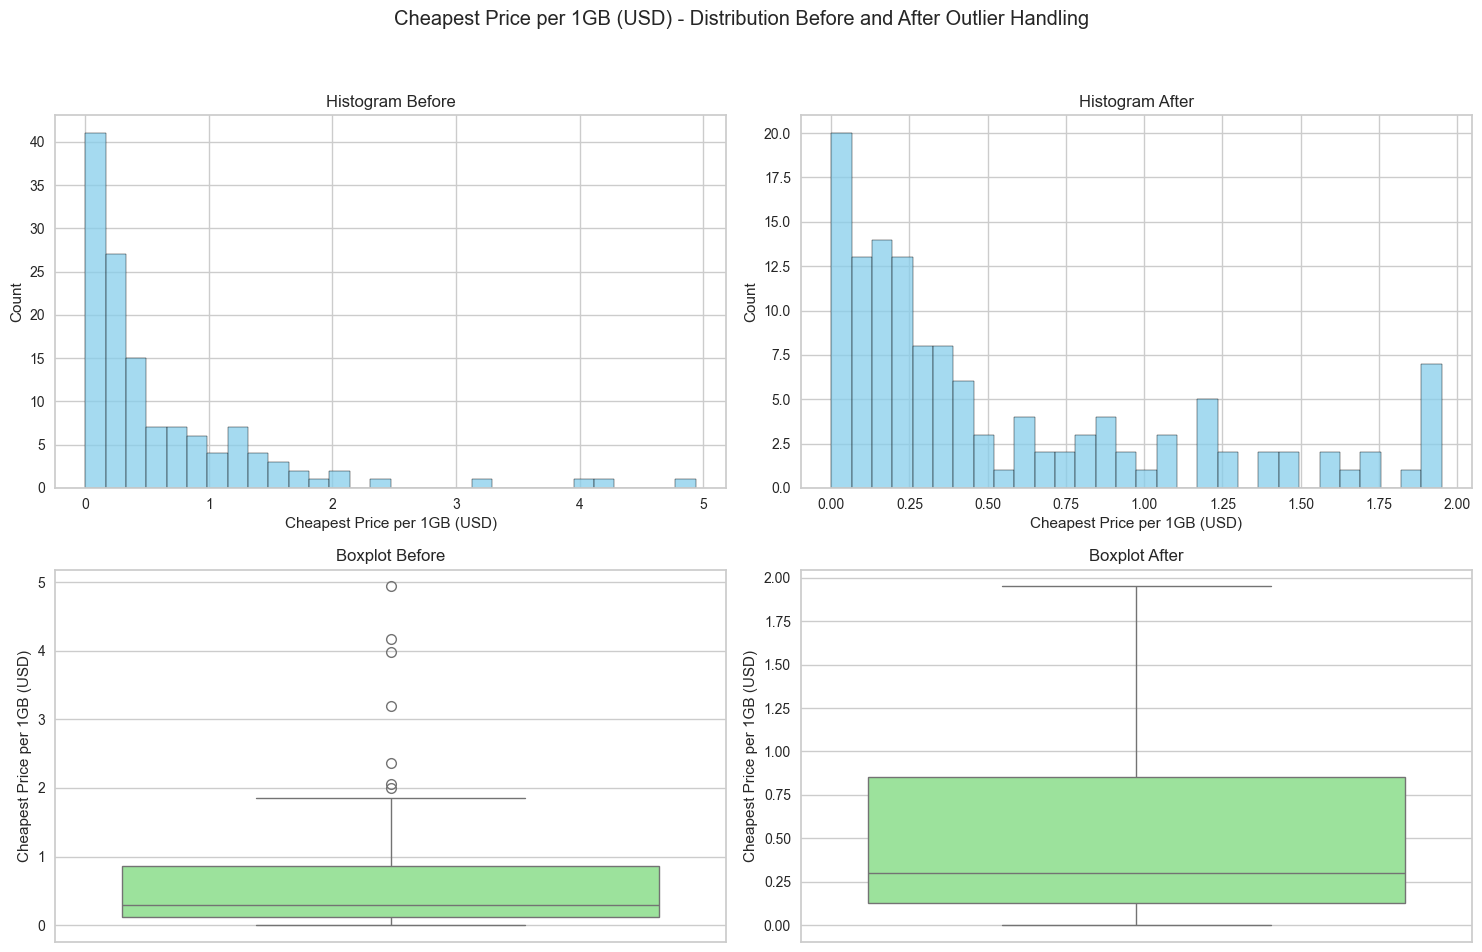

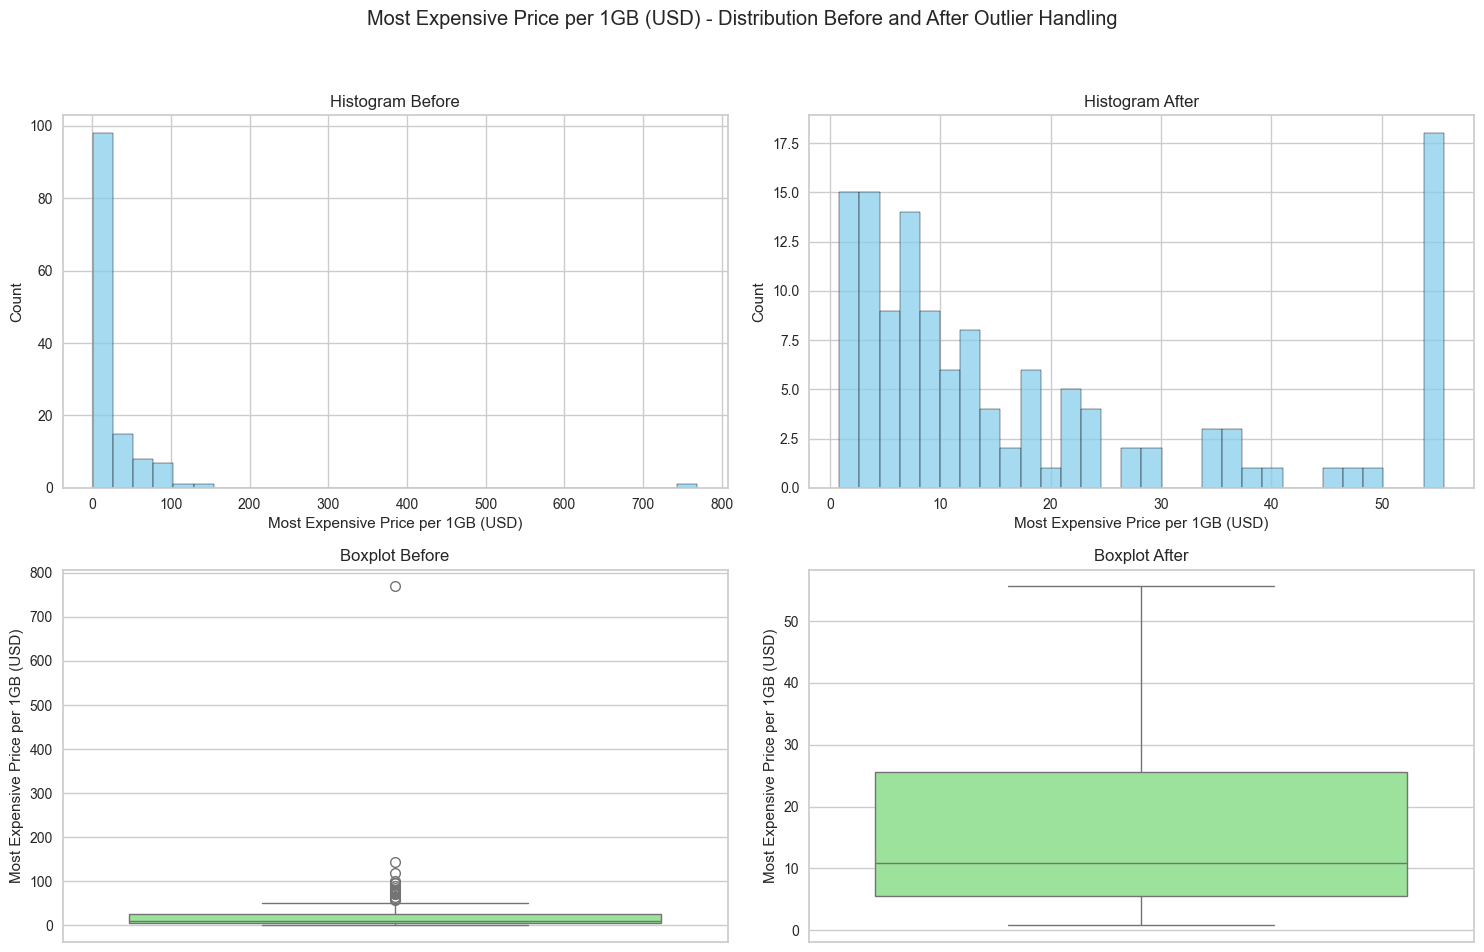

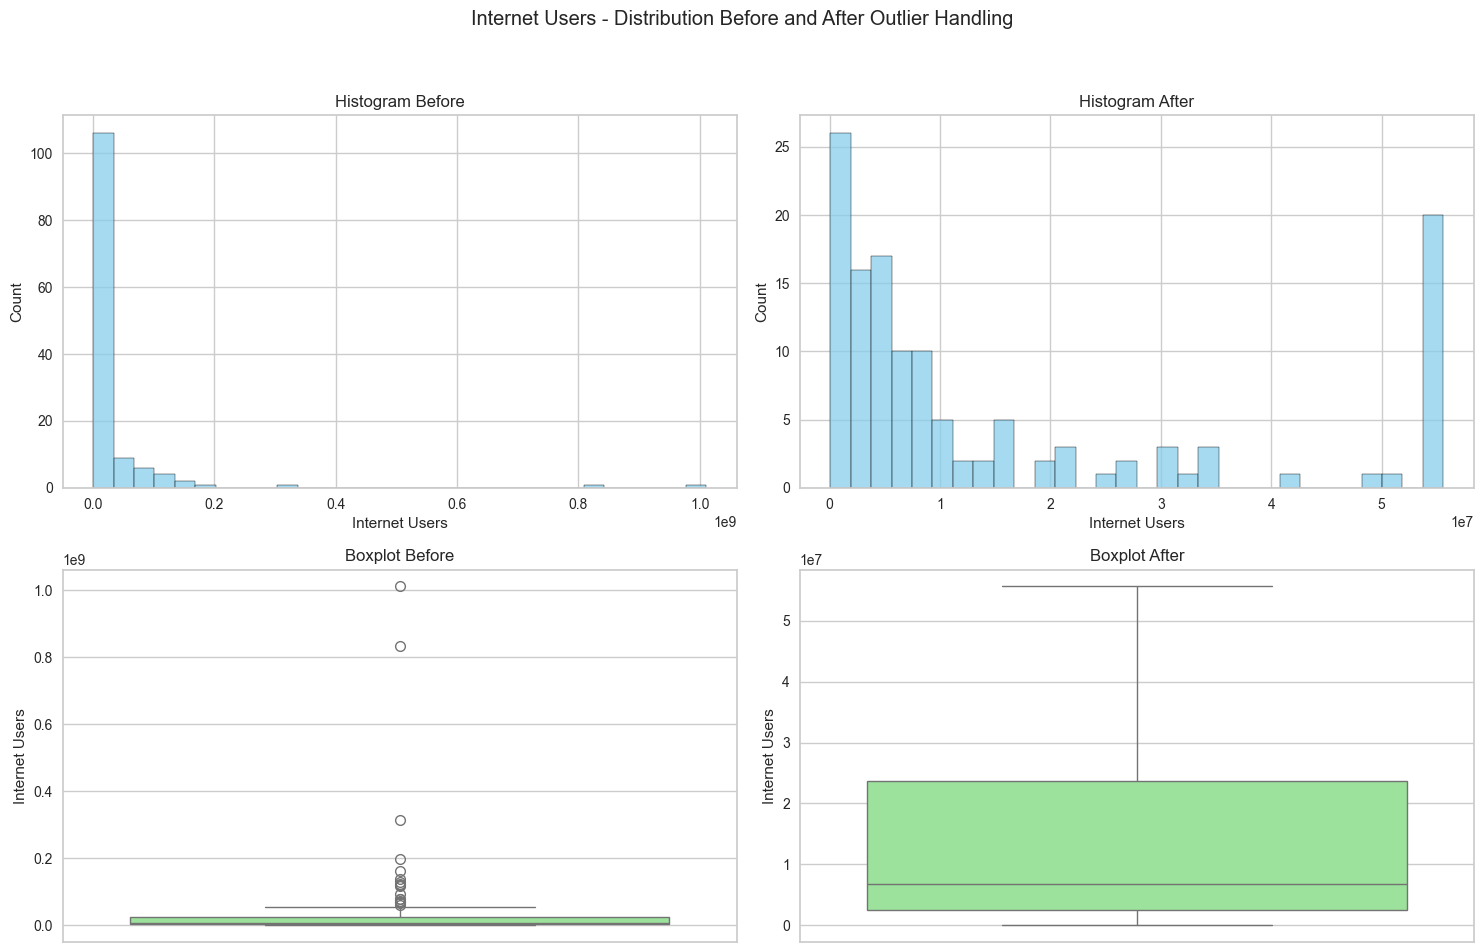

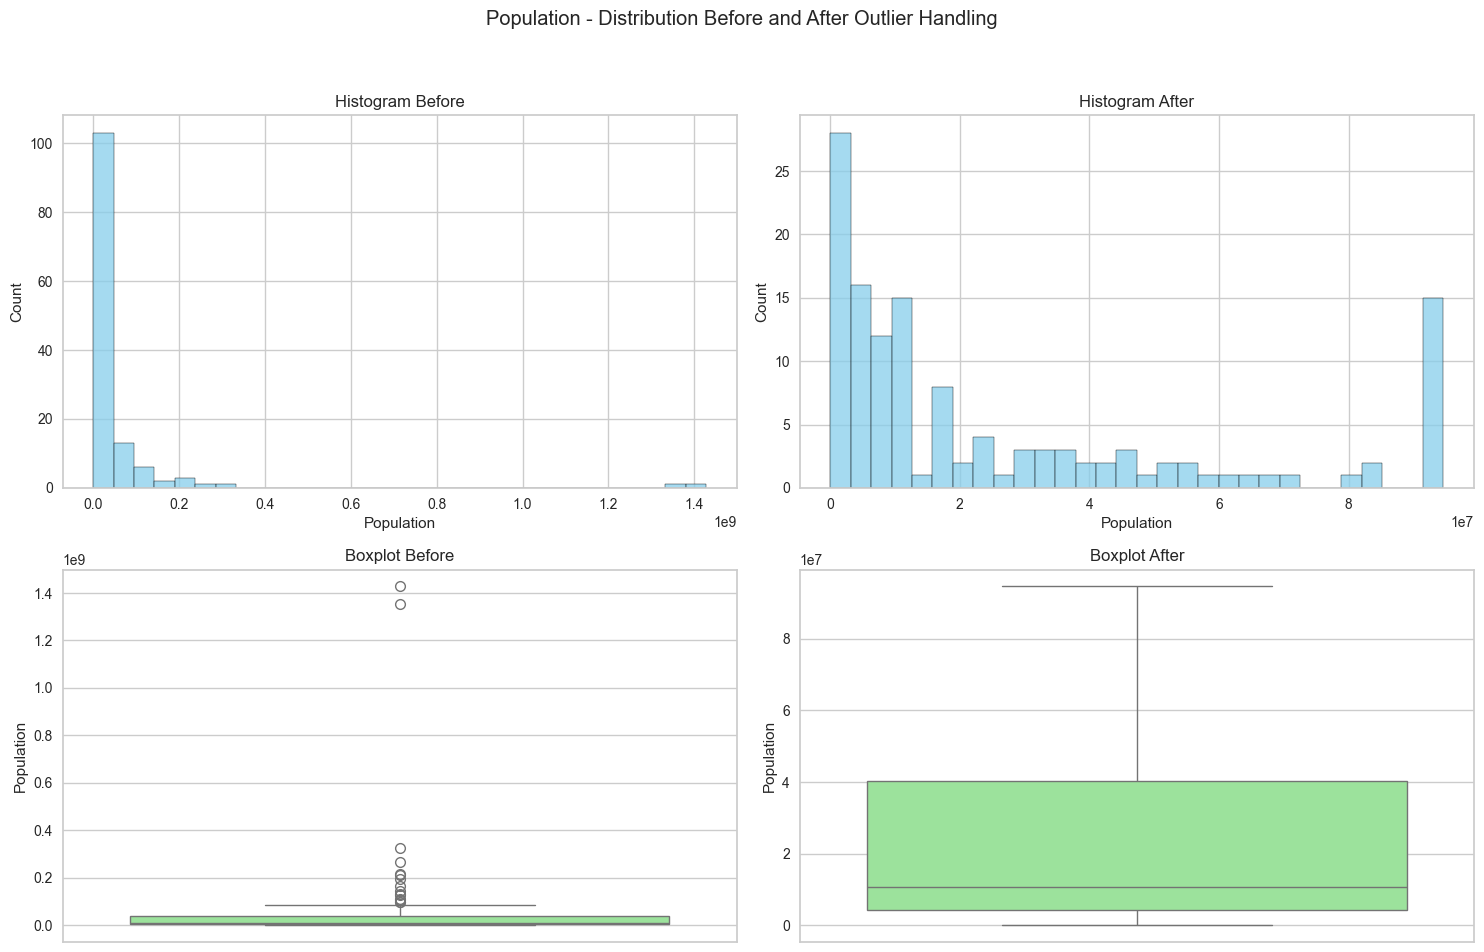

In [101]:

# Using the Function
for col in num_cols:
    outlier_handling_plot_comparison(data, data_capped, col)

Sudah terlihat bahwa outlier di decrease(dihilangkan dan diganti) dan selanjutnya scaling.

catatan: karena objective kita adalah Kmeans tidak menggunakan kolom categorical, sehingga tidak encoding

### Scaling Data

In [102]:
# membuat subset data untuk di fit Kmeans 
# --------------------------

# Filter Numerical Columns into Variable
num_cols = data.select_dtypes(include=np.number).columns.to_list()
# subset dataspilt
data_spilt = data_capped[num_cols]
data_spilt.head()

Cost of Living Index  Rent Index  Groceries Index  Restaurant Price Index  \
0                 20.37        2.72            14.92                   12.41   
1                 35.50        8.47            29.32                   25.82   
2                 26.87        4.59            28.82                   14.48   
3                 34.69        7.71            28.17                   33.32   
4                 33.89       11.61            27.59                   30.55   

   Local Purchasing Power Index  Number of Internet Plans  \
0                         23.04                      35.0   
1                         30.19                      32.0   
2                         24.63                      20.0   
3                         30.72                      28.0   
4                         28.86                      21.0   

   Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                         1.02                          0.38   
1                         2.80                          0.72   
2                         0.51                          0.16   
3                         2.38                          0.44   
4                         0.76                          0.22   

   Most Expensive Price per 1GB (USD)  Internet Users  Population  
0                              2.1200       4068194.0  37171921.0  
1                             55.6025       2105339.0   2882740.0  
2                              2.2400      26350000.0  42228408.0  
3                             11.4700      33561876.0  44361150.0  
4                             13.0200       2043110.0   2951745.0

In [103]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_spilt)

In [104]:
data_scaled

array([[-1.55008363, -1.36943306, -1.68138011, ..., -0.91674677,
        -0.62910502,  0.32970828],
       [-0.72629037, -0.8380038 , -0.88441158, ...,  2.04243465,
        -0.7303128 , -0.77600818],
       [-1.19617377, -1.19660302, -0.9120841 , ..., -0.91010718,
         0.51977865,  0.49276382],
       ...,
       [-0.61848398, -0.39899702, -0.36527513, ..., -0.72696521,
         2.0275729 ,  2.18181312],
       [ 0.23416655, -1.00066736,  1.20763082, ...,  1.17583008,
        -0.44965455,  0.05002409],
       [-0.86023164, -0.76499004, -0.76209905, ..., -0.65780283,
        -0.59339759, -0.30943022]])

Alasan menggunakan StandardScaler cocok untuk algoritma PCA (Principal Component Analysis) dan KMeans clustering.
berikut alasan lain:

- Menghilangkan Bias pada Variabel: Ketika variabel memiliki rentang yang berbeda, mereka dapat memiliki dampak yang tidak proporsional pada analisis

- Mempertahankan Struktur Data: mempertahankan struktur data relatif penting untuk memastikan bahwa komponen utama yang dihasilkan mewakili variasi yang signifikan dalam data

- Menghindari Pemusatan Pada Tengah Rentang: KMeans sangat dipengaruhi oleh pusat dan dispersi dari setiap fitur dalam data.

Selanjutnya melakukan PCA Karena Kmeans 

### Demensionality Reduction

In [105]:
# fit df_scaled dengan pca untuk plot cumulative  variance
pca = PCA()
pca.fit(data_scaled)

PCA()

In [106]:
data_scaled.shape

(131, 11)

Text(0, 0.5, 'Eigenvalues')

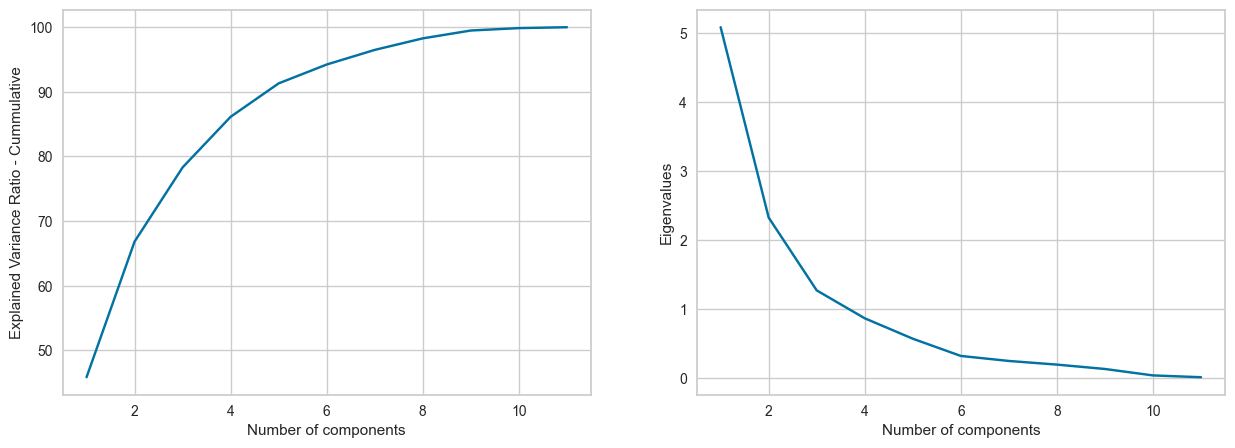

In [107]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)

plt.plot(range(1, 12), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

explain:
- Hasil visualisasi dari Explained Variance Ratio Cummulative jika ingin 95% infomasinya adalah 7 faeture
- Hasil dari Eigenvalues adalah 2,2 di angka komponen 2,3 dan 6 yang berpengaruh terhadap variance 

In [108]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print('Features: ',num_features)

Features:  7


In [109]:
# fitting pca dengan 95% informasi yang diambil
pca = PCA(n_components=0.95)
pca.fit(data_scaled)

data_scaled_pca = pca.transform(data_scaled)

In [110]:
data_scaled_pca

array([[-3.06002175e+00, -1.19646309e+00,  7.35789335e-02,
         3.06848385e-02, -4.17626054e-01, -4.28476341e-01,
        -6.25642565e-02],
       [-5.15712849e-01, -1.53000791e+00, -1.04866993e+00,
        -2.06180687e+00,  2.00281619e-01, -4.73344718e-02,
        -6.39163353e-01],
       [-2.73771405e+00, -5.38029607e-01,  1.35765567e-01,
         5.92013160e-01,  9.10933651e-01, -4.13966980e-01,
         2.08697689e-01],
       [-1.66299662e+00, -4.80991869e-02, -7.37860311e-01,
         3.55625868e-01,  3.91613958e-01, -4.74271255e-01,
         1.59985035e-01],
       [-1.38088655e+00, -1.51626240e+00,  8.90225345e-01,
        -1.99503545e-01,  3.78653469e-01, -2.33525749e-01,
        -2.68079319e-01],
       [ 2.56028054e+00,  2.41954100e+00,  2.22322475e+00,
         4.82578602e-01, -2.78642699e-01, -5.62522072e-02,
         2.72969412e-01],
       [ 1.80199639e+00,  1.42259984e+00,  1.58122166e+00,
        -7.83639810e-01, -9.36127803e-01,  6.61037457e-01,
        -6.1431313

Sudah di fit dan mendapat 7 feature yang dipakai

---

# vi. Modeling

Dalam clustering sebelum prediksi kita perlu mencari nilai optimal dari n_components cluster. cara menentukannya bisa secara objective dari User atau menggunakan metode statistika (Elbow method, Silhoutte Scor, atau yang lain)

#### **Elbow method**

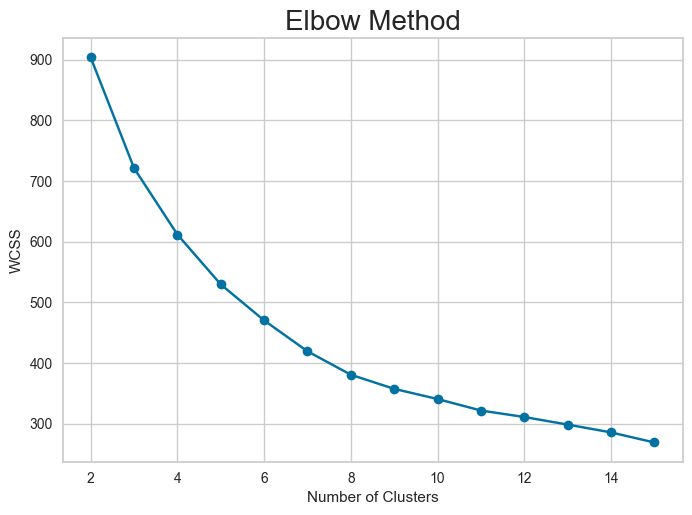

In [111]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 2
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")

plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method to determine the number of clusters to be formed:


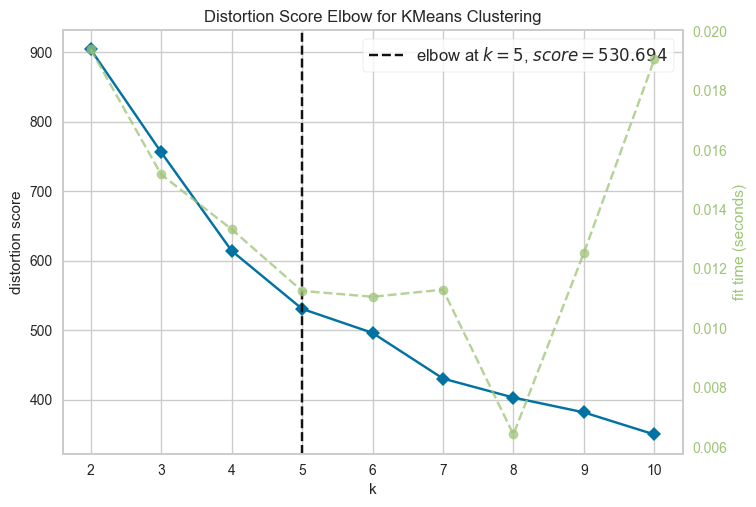

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_scaled_pca)
Elbow_M.show()

Explained:

Berdasarkan hasil visualisasi pertama dengan set Max K = 15 saya asumsikan penurunan di` 4 atau 5` cluster. sedangkan di Yellowbrick dengan set Max K = 10 cluster di angka `5`


--

### **Silhoutte Plot & Silhoutte Score**

In [113]:
# Function to create Silhouette Plot


def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
     

For n_clusters = 2 The average silhouette_score is : 0.3497876331832971
For n_clusters = 3 The average silhouette_score is : 0.25555495392800126
For n_clusters = 4 The average silhouette_score is : 0.29288132007316403
For n_clusters = 5 The average silhouette_score is : 0.2711034610941499
For n_clusters = 6 The average silhouette_score is : 0.28892154163012956
For n_clusters = 7 The average silhouette_score is : 0.3060979687050447
For n_clusters = 8 The average silhouette_score is : 0.26907556502871377
For n_clusters = 9 The average silhouette_score is : 0.24750938156467822
For n_clusters = 10 The average silhouette_score is : 0.25516710867313713
For n_clusters = 11 The average silhouette_score is : 0.2360489547611253
For n_clusters = 12 The average silhouette_score is : 0.2503933904309954
For n_clusters = 13 The average silhouette_score is : 0.2341446341494825
For n_clusters = 14 The average silhouette_score is : 0.23193754732312163


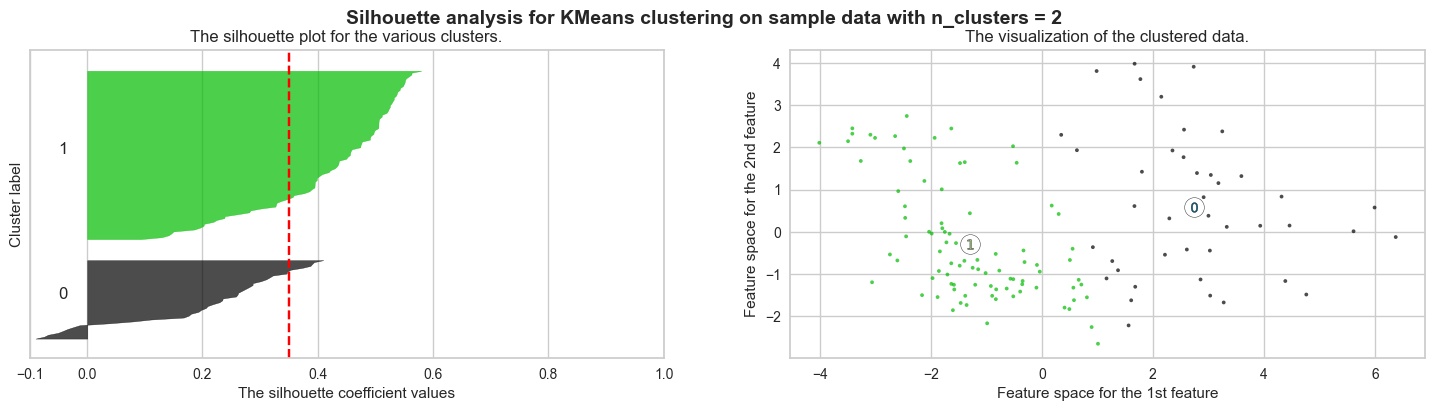

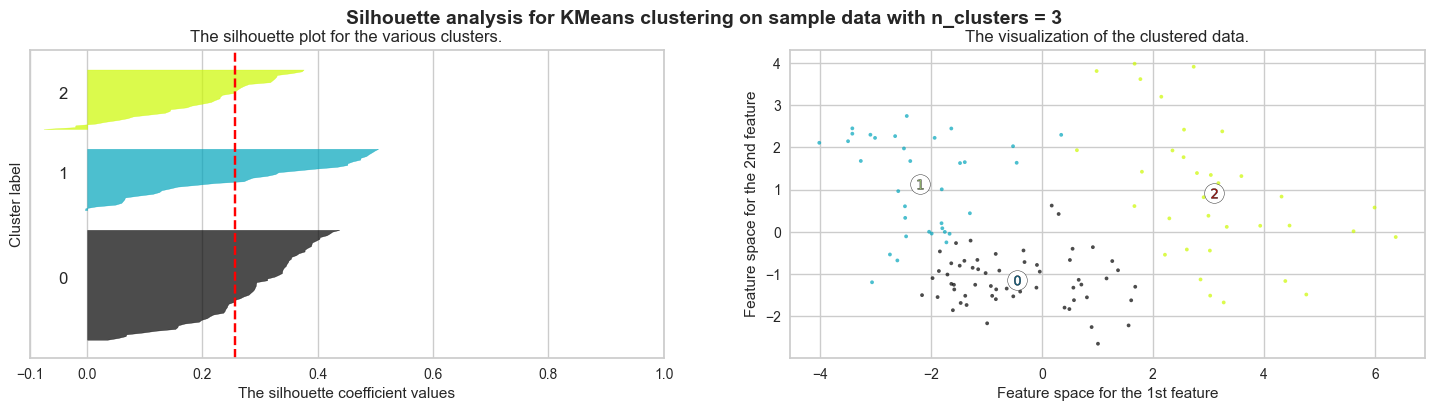

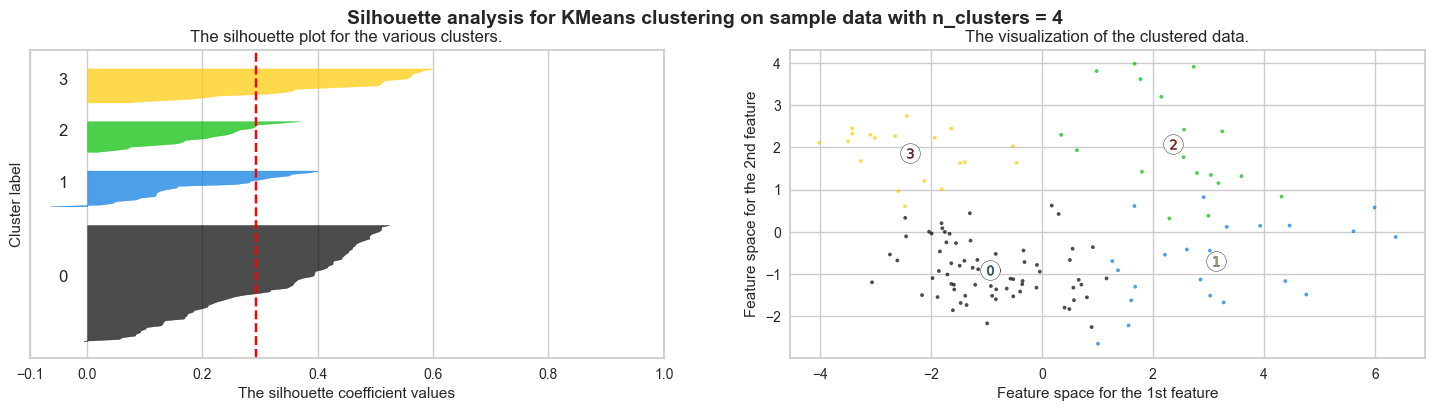

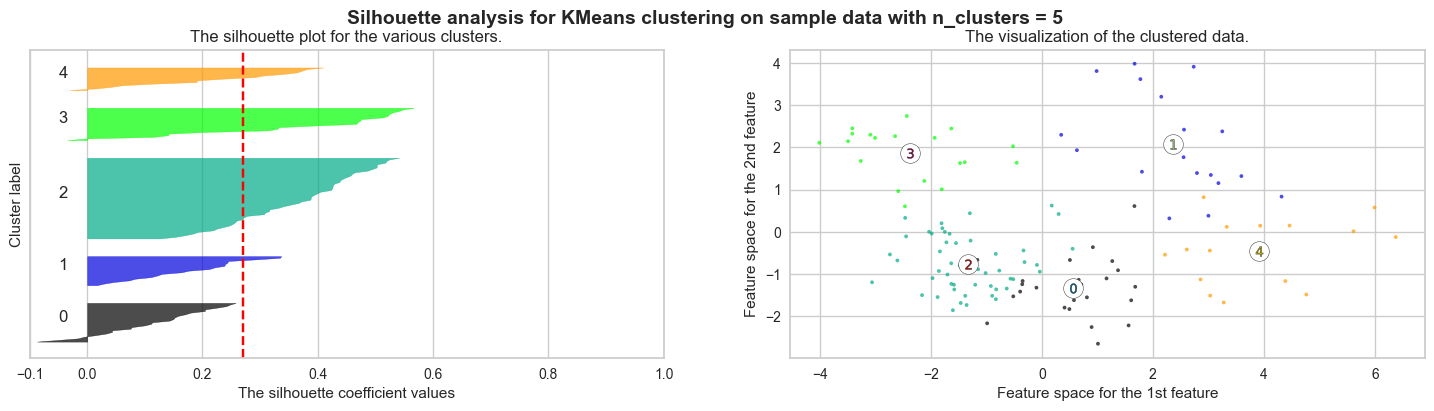

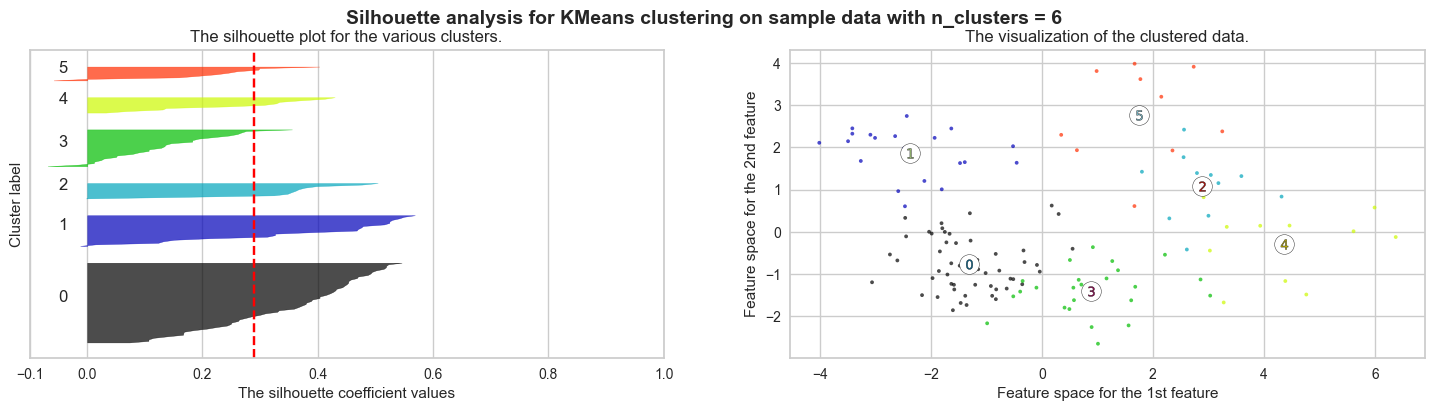

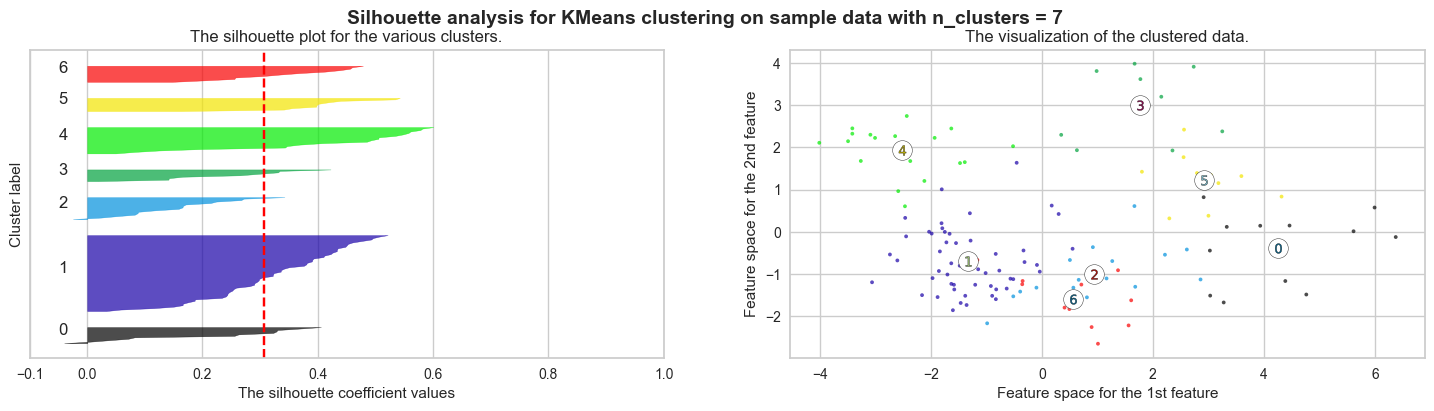

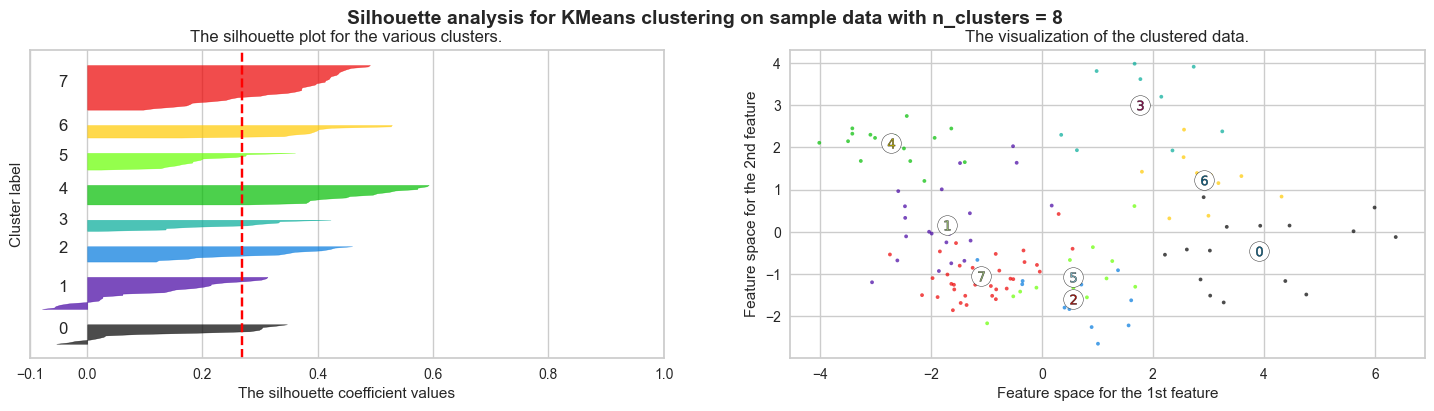

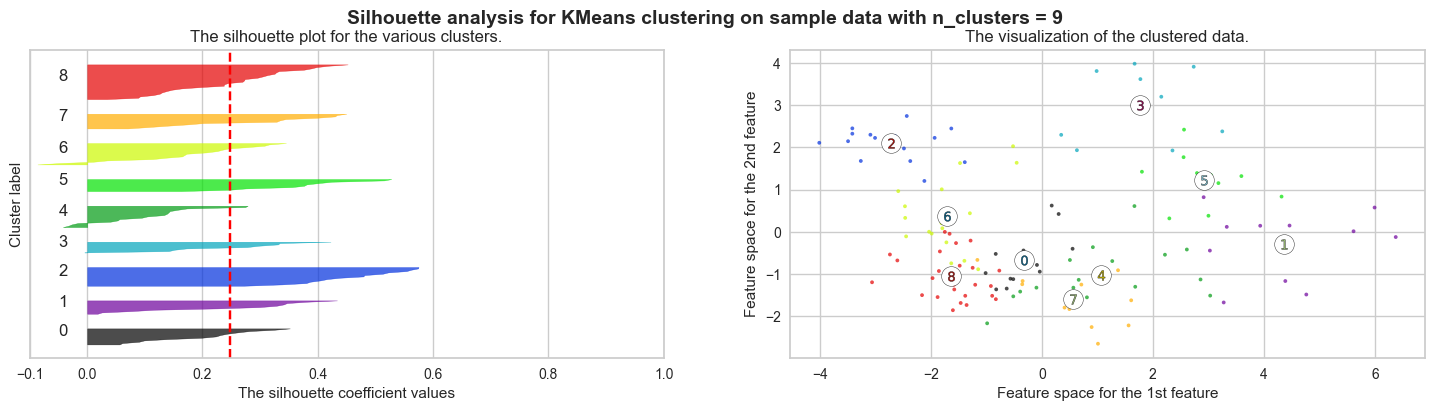

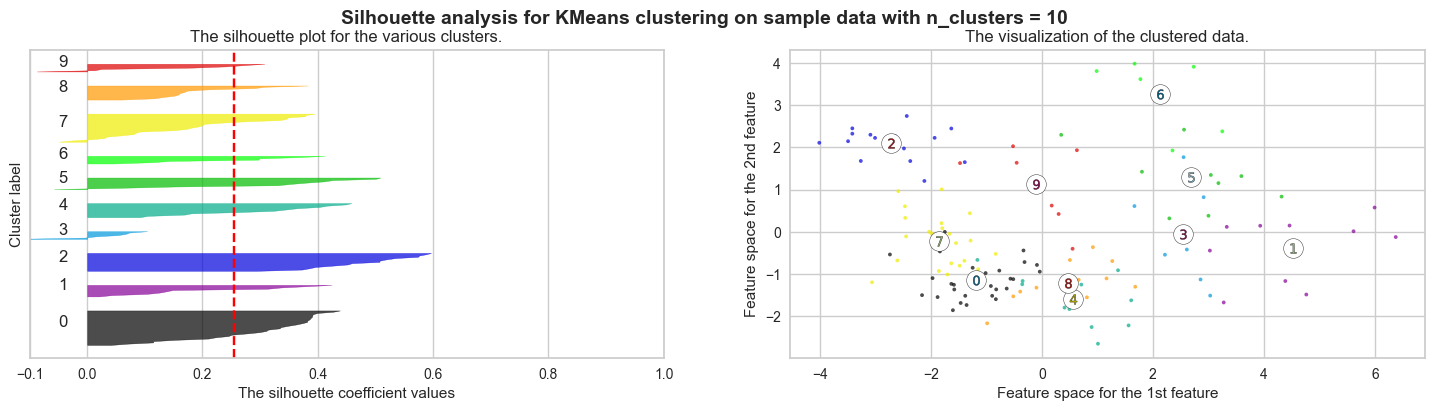

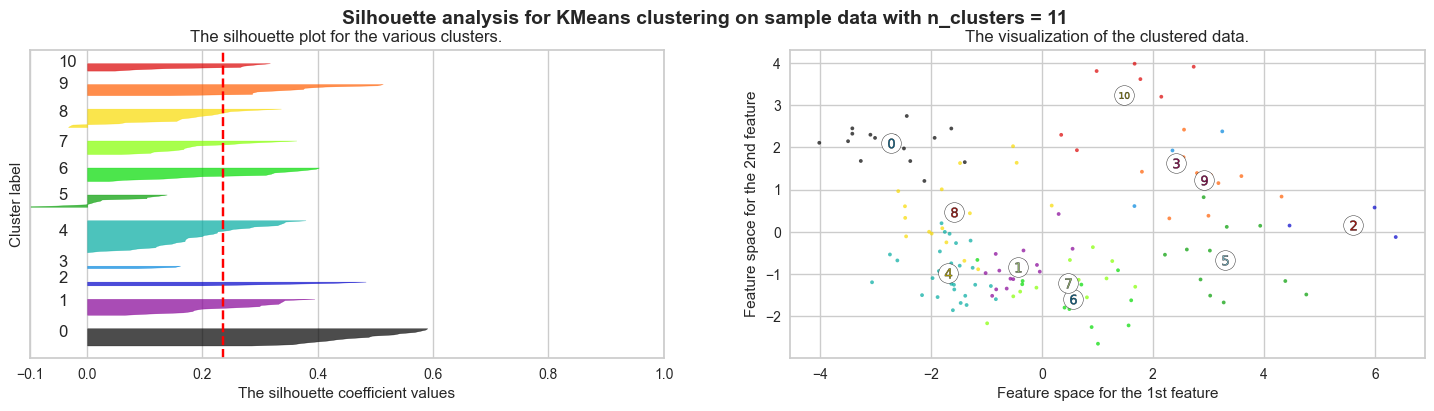

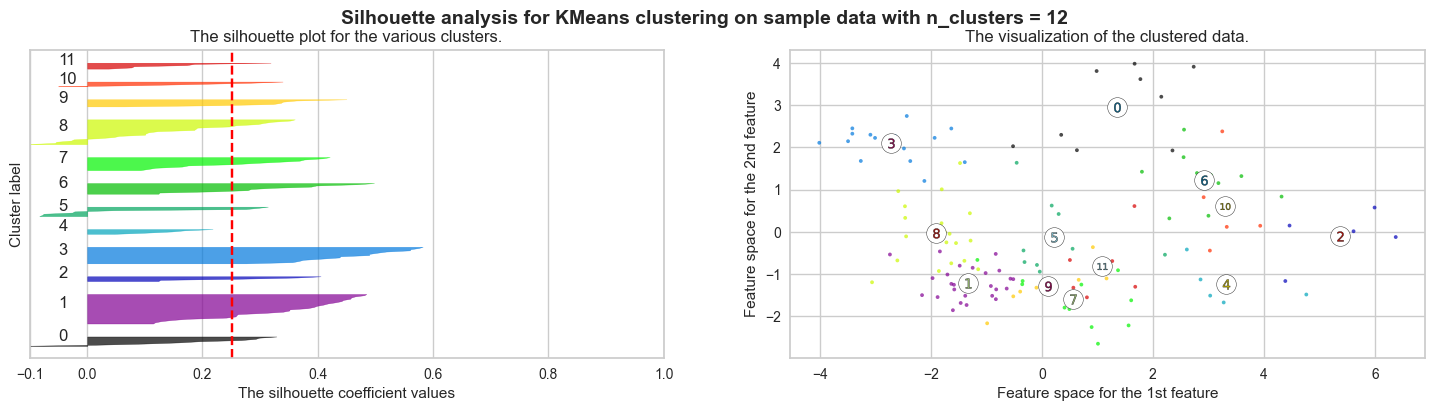

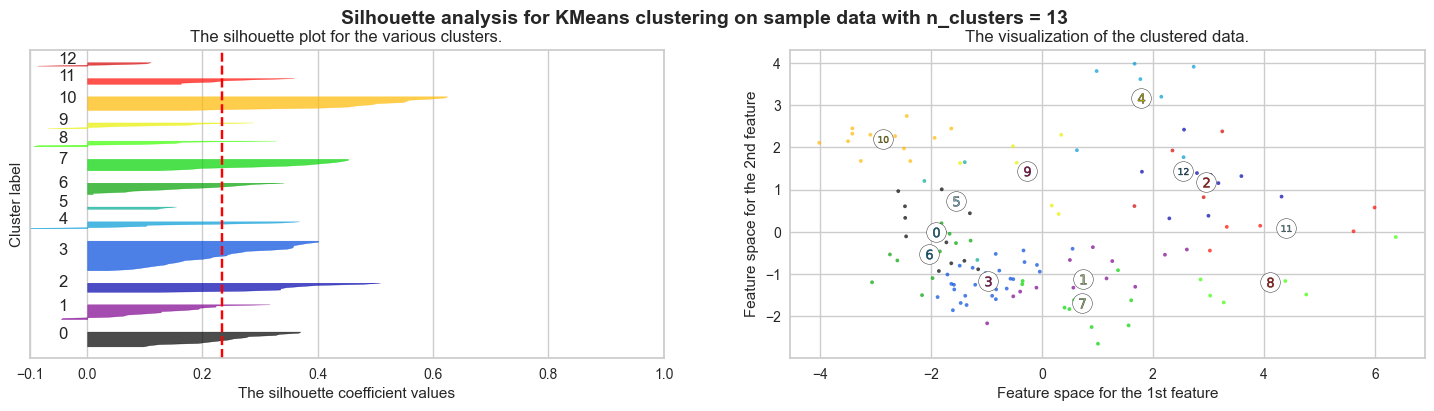

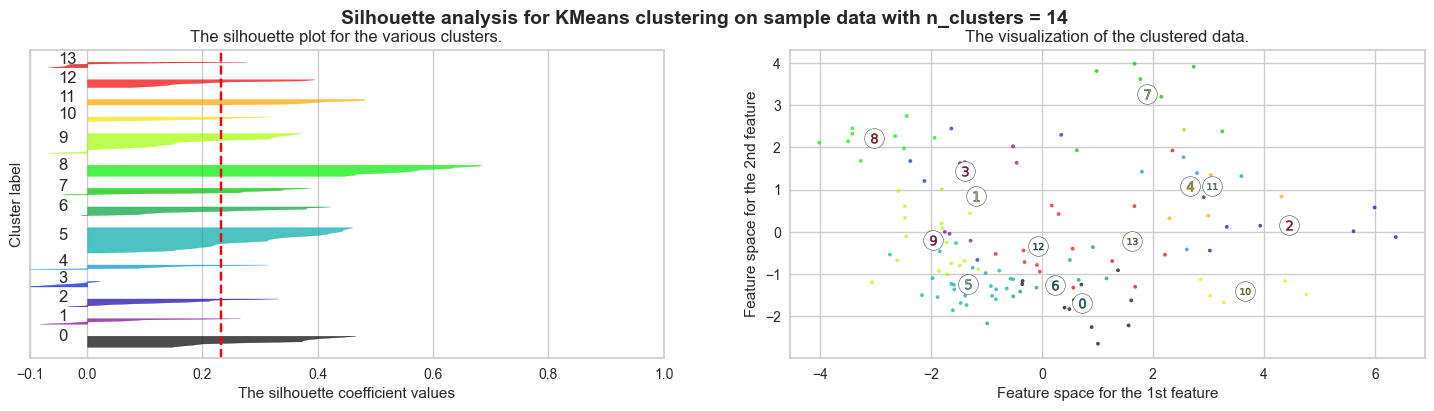

In [114]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)

Explaiend :

Berdasarkan hasil dari visualisasi metode silhouette jumlah `cluster yang menunjukkan 3 `lebih baik dalam hal pengelompokkan data

## Model Train & Predict

In [115]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(data_scaled_pca)
pred

array([1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1])

### Memasukan data cluster ke Dataframe observasi

In [116]:
# drop duplicate
data_analyz.drop_duplicates(inplace=True)

# Drop Missing value
data_analyz.dropna(inplace=True)

# Insert clustering result into original dataset
data_analyz['cluster'] = pred
data_analyz

Country Country code    Continental Region  Cost of Living Index  \
0    Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
1        Albania           AL        EASTERN EUROPE                 35.50   
2        Algeria           DZ       NORTHERN AFRICA                 26.87   
3      Argentina           AR         SOUTH AMERICA                 34.69   
4        Armenia           AM     CIS (FORMER USSR)                 33.89   
..           ...          ...                   ...                   ...   
132      Uruguay           UY         SOUTH AMERICA                 52.07   
133   Uzbekistan           UZ     CIS (FORMER USSR)                 27.31   
134      Vietnam           VN  ASIA (EX. NEAR EAST)                 37.48   
135        Yemen           YE             NEAR EAST                 53.14   
136       Zambia           ZM    SUB-SAHARAN AFRICA                 33.04   

     Rent Index  Groceries Index  Restaurant Price Index  \
0          2.72            14.92                   12.41   
1          8.47            29.32                   25.82   
2          4.59            28.82                   14.48   
3          7.71            28.17                   33.32   
4         11.61            27.59                   30.55   
..          ...              ...                     ...   
132       13.93            44.01                   49.39   
133        9.29            26.83                   24.22   
134       13.22            38.70                   19.98   
135        6.71            67.12                   24.74   
136        9.26            31.53                   22.46   

     Local Purchasing Power Index  Number of Internet Plans  \
0                           23.04                      35.0   
1                           30.19                      32.0   
2                           24.63                      20.0   
3                           30.72                      28.0   
4                           28.86                      21.0   
..                            ...                       ...   
132                         30.07                      35.0   
133                         22.37                      60.0   
134                         29.38                      46.0   
135                         14.41                      17.0   
136                         40.33                      60.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                           1.02                          0.38   
1                           2.80                          0.72   
2                           0.51                          0.16   
3                           2.38                          0.44   
4                           0.76                          0.22   
..                           ...                           ...   
132                         1.51                          0.10   
133                         0.60                          0.01   
134                         0.49                          0.07   
135                        15.98                          0.40   
136                         1.13                          0.01   

     Most Expensive Price per 1GB (USD) Internet Users  Population  \
0                                  2.12      4,068,194  37,171,921   
1                                 96.39      2,105,339   2,882,740   
2                                  2.24     26,350,000  42,228,408   
3                                 11.47     33,561,876  44,361,150   
4                                 13.02      2,043,110   2,951,745   
..                                  ...            ...         ...   
132                                6.33      2,360,269   3,449,285   
133                               23.75     16,692,456  32,476,244   
134                                5.55     68,172,134  95,545,962   
135                               39.94      7,548,512  28,498,683   
136                                6.80    

### Visualisasi Output Cluster

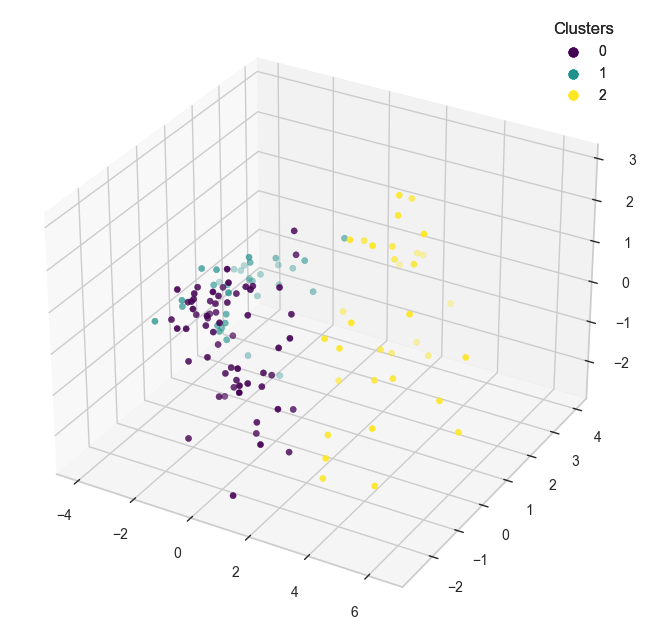

In [117]:
# Membuat dimensi jadi 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(data_scaled_pca)
df_scaled_pca_3d = pca_3d.transform(data_scaled_pca)

#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=data_analyz['cluster'], cmap='viridis')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

Conclusions:

Bedasarkan hasil yang di peroleh dalam menentukan cluster dengan Dua method Elbow method dan silhouette , `cluster 3 `yang mana lebih baik dalam pengelompokkan bisa dilihat visualisasi scatter. saya melakukan train dan predikisi Kmeans setelah itu saya memasukan ke dataframe observasi.

---

# vii. Model Infernce

### Model saving

In [130]:
# Model Saving
with open('model/scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model/pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('model/kmeans.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

### Load Model

In [131]:
# Load Model

with open("model/scaler.pkl", "rb") as file_1:
  scaler = pickle.load(file_1)

with open("model/pca.pkl", "rb") as file_2:
  pca = pickle.load(file_2)

with open("model/kmeans.pkl", "rb") as file_3:
  km = pickle.load(file_3)

In [144]:
print(data_spilt['Groceries Index'].max())
print(data_spilt['Groceries Index'].min())

89.645
14.92


In [136]:
data_spilt.columns

Index(['Cost of Living Index', 'Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Number of Internet Plans', 'Average Price per 1GB (USD)',
       'Cheapest Price per 1GB (USD)', 'Most Expensive Price per 1GB (USD)',
       'Internet Users', 'Population'],
      dtype='object')

In [138]:
data_spilt.head()

Cost of Living Index  Rent Index  Groceries Index  Restaurant Price Index  \
0                 20.37        2.72            14.92                   12.41   
1                 35.50        8.47            29.32                   25.82   
2                 26.87        4.59            28.82                   14.48   
3                 34.69        7.71            28.17                   33.32   
4                 33.89       11.61            27.59                   30.55   

   Local Purchasing Power Index  Number of Internet Plans  \
0                         23.04                      35.0   
1                         30.19                      32.0   
2                         24.63                      20.0   
3                         30.72                      28.0   
4                         28.86                      21.0   

   Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                         1.02                          0.38   
1                         2.80                          0.72   
2                         0.51                          0.16   
3                         2.38                          0.44   
4                         0.76                          0.22   

   Most Expensive Price per 1GB (USD)  Internet Users  Population  
0                              2.1200       4068194.0  37171921.0  
1                             55.6025       2105339.0   2882740.0  
2                              2.2400      26350000.0  42228408.0  
3                             11.4700      33561876.0  44361150.0  
4                             13.0200       2043110.0   2951745.0

### Generate random data

In [146]:
# membuat data baru

num_sample = 20

data_inf = {
    'Cost of Living Index':np.random.uniform(15, 100, num_sample), 
    'Rent Index':np.random.uniform(15,100,num_sample),
    'Groceries Index':np.random.uniform(15,100, num_sample),
    'Restaurant Price Index':np.random.uniform(15,100,num_sample),
    'Local Purchasing Power Index':np.random.uniform(20, 200, num_sample),
    'Number of Internet Plans':np.random.randint(1,50, num_sample),
    'Average Price per 1GB (USD)':np.random.uniform(1,5, num_sample),
    'Cheapest Price per 1GB (USD)':np.random.uniform(0.5, 3, num_sample),
    'Most Expensive Price per 1GB (USD)':np.random.uniform(3, 10, num_sample),
    'Internet Users':np.random.randint(500000, 2000000, num_sample),
    'Population':np.random.randint(1000000, 5000000, num_sample),
}

# Convert to DataFrame
data_inf =  pd.DataFrame(data_inf)

# Display the DataFrame
data_inf.head()


Cost of Living Index  Rent Index  Groceries Index  Restaurant Price Index  \
0             38.482995   72.231046        88.930385               41.273244   
1             49.348313   67.655252        62.779606               50.587283   
2             95.043730   98.472122        59.482655               24.680816   
3             65.159774   64.255444        82.259492               77.061557   
4             56.347604   49.970962        60.601287               28.852393   

   Local Purchasing Power Index  Number of Internet Plans  \
0                     83.807869                        39   
1                    179.972183                        40   
2                     79.302836                        43   
3                    138.999829                        35   
4                    187.135253                        37   

   Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                     3.198197                      1.686462   
1                     1.202021                      2.062230   
2                     3.100500                      1.274962   
3                     4.315994                      2.932054   
4                     4.512604                      1.587267   

   Most Expensive Price per 1GB (USD)  Internet Users  Population  
0                            7.583406          589265     1087303  
1                            5.299929         1759685     3803507  
2                            5.665276         1494257     4484741  
3                            3.885213         1764619     1543691  
4                            9.041931         1644816     3089255

### Scaling & PCA

In [147]:
# Scaling
data_scaled = scaler.transform(data_inf)

# PCA 
data_scaled_pca = pca.transform(data_scaled)
data_scaled_pca

array([[ 3.76477525,  0.49704761,  0.463683  ,  1.55827871, -2.01711562,
         0.25541414, -0.64323212],
       [ 4.32099622,  1.55387311,  1.5505833 ,  1.30793952, -2.64835367,
        -2.99515847, -1.62155521],
       [ 4.67363004,  1.40590361,  1.22497565,  1.88445445, -2.21168966,
         0.86181715, -1.11571435],
       [ 5.92529797,  0.64306735, -0.22057976,  2.33271964, -2.82641104,
        -1.61694263, -1.20701611],
       [ 3.92924623,  1.05858274,  0.54111619,  0.33698032, -2.42214261,
        -3.49214467,  0.54874322],
       [ 1.68942983, -0.73366725,  0.87741892,  1.46139489, -0.93995252,
        -0.39326748, -1.96091766],
       [ 3.79912578,  0.17161402,  0.21815078,  0.41302497, -2.04612447,
        -3.91634138, -0.14329534],
       [ 4.48216332,  0.56246879,  1.68726428,  1.40616191, -0.6094596 ,
        -3.89403184, -0.57959745],
       [ 3.51408831, -0.07461921, -0.47385157,  1.36896931, -2.56156584,
        -2.50105735, -1.10380152],
       [ 1.66271428, -1.4906

In [148]:
# Predict
km_pred_inference = km.fit_predict(data_scaled_pca)
km_pred_inference

array([1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2])

In [149]:
# Insert clustering result into inferennce dataset

data_inf['cluster'] = km_pred_inference
data_inf

Cost of Living Index  Rent Index  Groceries Index  Restaurant Price Index  \
0              38.482995   72.231046        88.930385               41.273244   
1              49.348313   67.655252        62.779606               50.587283   
2              95.043730   98.472122        59.482655               24.680816   
3              65.159774   64.255444        82.259492               77.061557   
4              56.347604   49.970962        60.601287               28.852393   
5              16.566741   73.573489        32.683695               59.414930   
6              84.349233   24.603659        23.855462               78.336817   
7              95.214247   43.146620        44.366190               54.787145   
8              87.381021   36.840345        41.390813               28.021943   
9              45.947364   46.101321        52.035385               40.838389   
10             78.814710   26.055951        84.520154               93.605915   
11             65.805799   71.214287        95.216288               34.513703   
12             89.158215   86.716618        29.014386               27.730138   
13             25.429126   51.603822        51.889968               45.151883   
14             25.616676   89.777252        24.608513               64.964451   
15             99.834966   23.485280        34.700834               49.115251   
16             60.778106   97.096138        92.295714               96.870536   
17             80.769681   59.785365        71.063805               95.129418   
18             56.427080   54.240679        68.762417               37.700900   
19             31.597760   33.812264        15.655917               54.598316   

    Local Purchasing Power Index  Number of Internet Plans  \
0                      83.807869                        39   
1                     179.972183                        40   
2                      79.302836                        43   
3                     138.999829                        35   
4                     187.135253                        37   
5                      40.694186                        16   
6                     168.028789                        29   
7                     185.558895                         6   
8                     142.480886                        36   
9                      40.094080                         5   
10                     29.384358                        21   
11                     28.403464                        45   
12                    150.430467                        38   
13                     71.766208                        37   
14                     80.109362                        20   
15                     61.823845                        29   
16                     95.808437                        34   
17                    151.735634                        46   
18                     30.278710                        37   
19                     80.923504                        33   

    Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                      3.198197                      1.686462   
1                      1.202021                      2.062230   
2                      3.100500                      1.274962   
3                      4.315994                      2.932054   
4                      4.512604                      1.587267   
5                      2.487843                      0.908929   
6                      4.921884                      1.744598   
7                      1.802817                      1.612887   
8                      2.919467                      2.844040   
9                      1.641881                      1.545990   
10                     3.967183                      1.372711   
11                     2.423827                      2.440656   
12                     3.899357                      2.638134   
13                     1.068332                      2.862806   
14                     1

<Axes: >

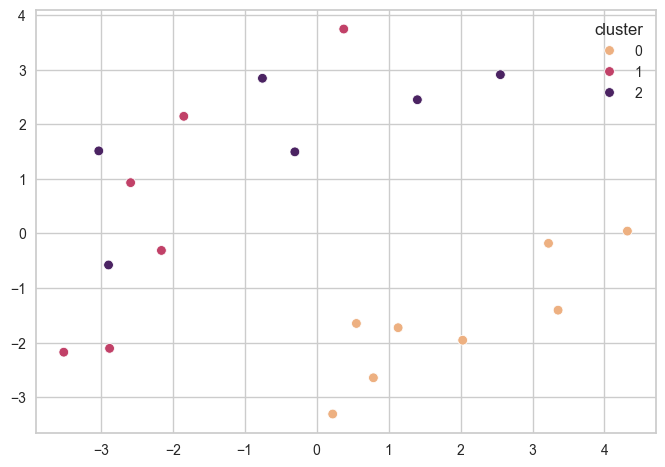

In [150]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled)

dataInf_scaled_PCA = pca_2d.fit_transform(data_scaled)

sns.scatterplot(x=dataInf_scaled_PCA[:,0], y=dataInf_scaled_PCA[:,1], hue=data_inf['cluster'], palette='flare')

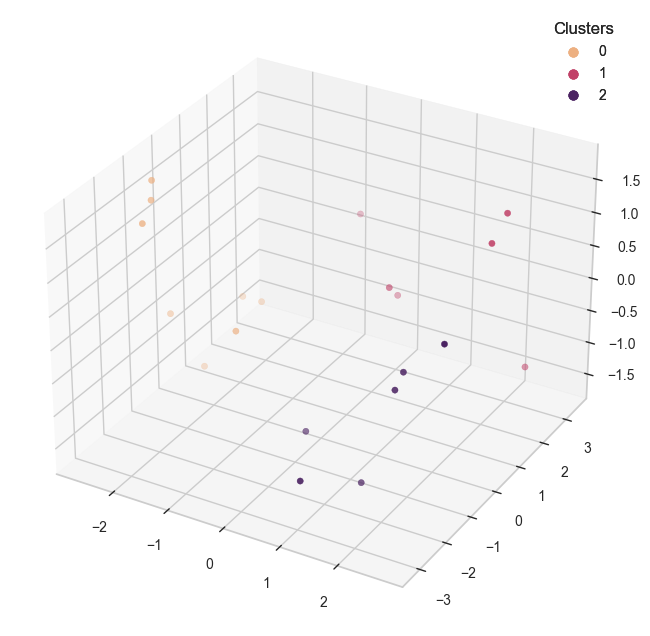

In [156]:
# Membuat dimensi jadi 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(data_scaled_pca)
df_scaled_pca_3d = pca_3d.transform(data_scaled_pca)

#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=data_inf['cluster'], cmap='flare')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

# viii. Exploratory Data Analysis (EDA) Cluster

<Axes: >

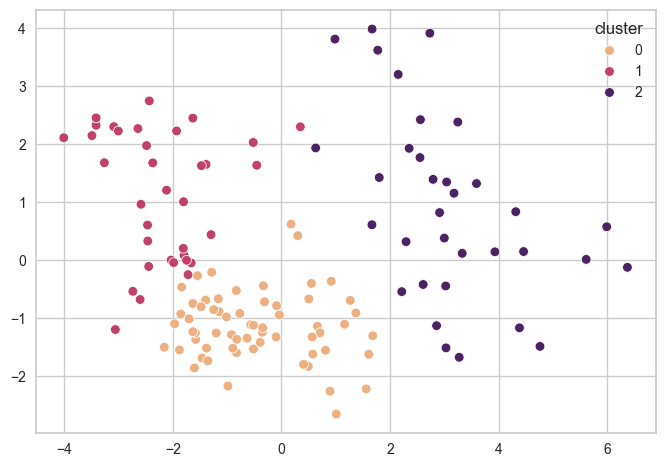

In [124]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled_pca)

df_scaled_pca_2d = pca_2d.fit_transform(data_scaled_pca)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=data_analyz['cluster'], palette='flare')

Hasil cluster terlihat cukup porpsional.

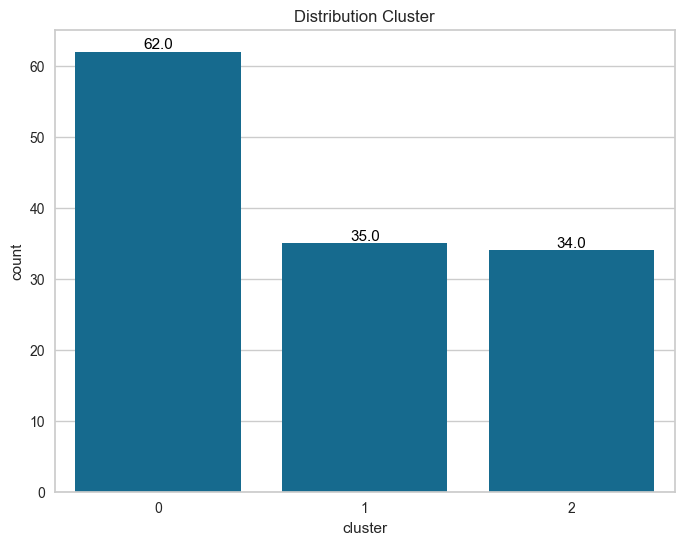

In [158]:
# Distribution Cluster
plt.figure(figsize=(8,6))
ax = sns.countplot(data=data_analyz, x='cluster')
plt.title('Distribution Cluster')
# Menambahkan notasi di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Dari hasil visualisasi cluster 0 lebih besar dibandingkan yang lainnya disusul cluster 1 dan 2 tidak ada perbadaan signifikan.` artinya ada 62 Negara di cluster 0, 35 Negara di cluster 1 dan 34 Negara di cluster 2`


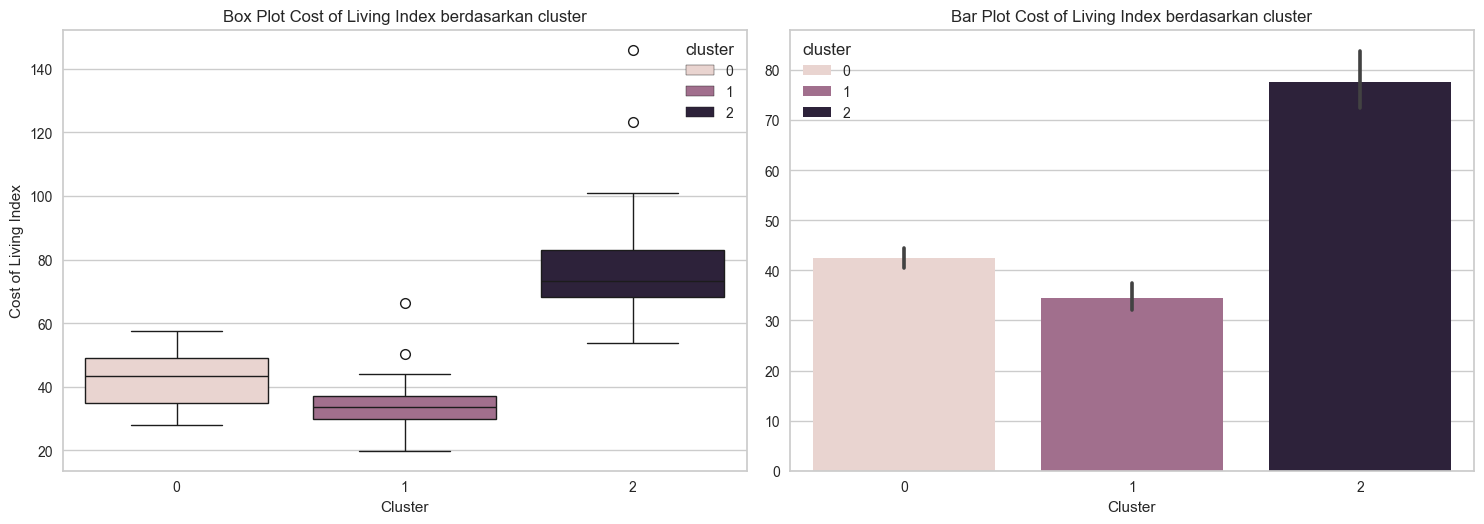

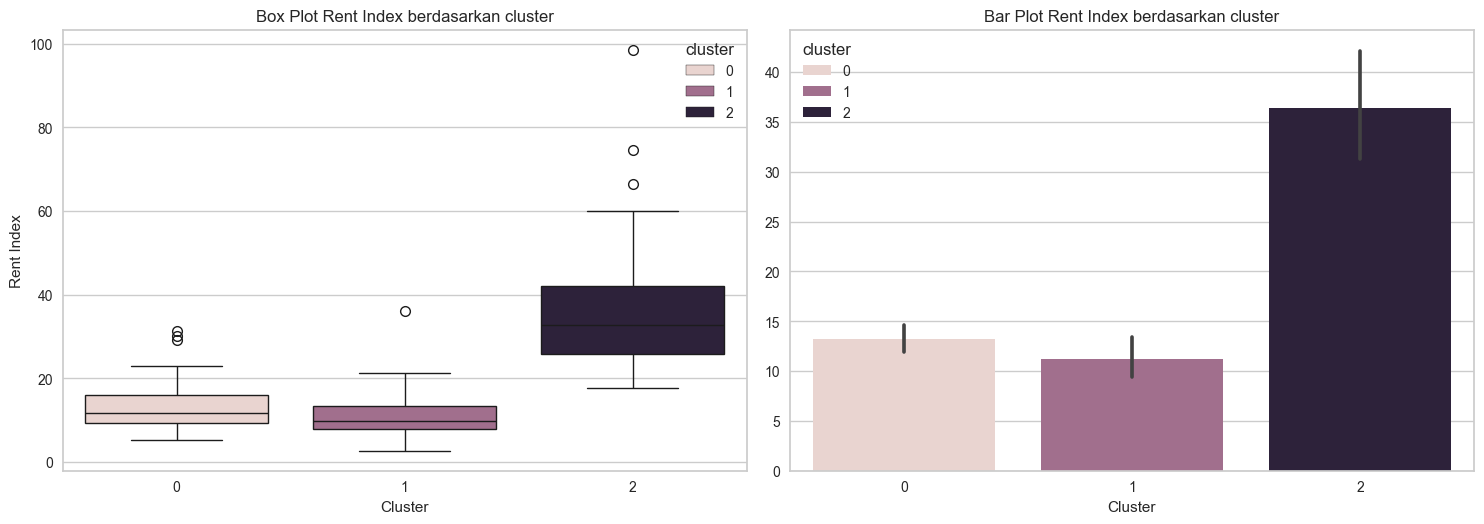

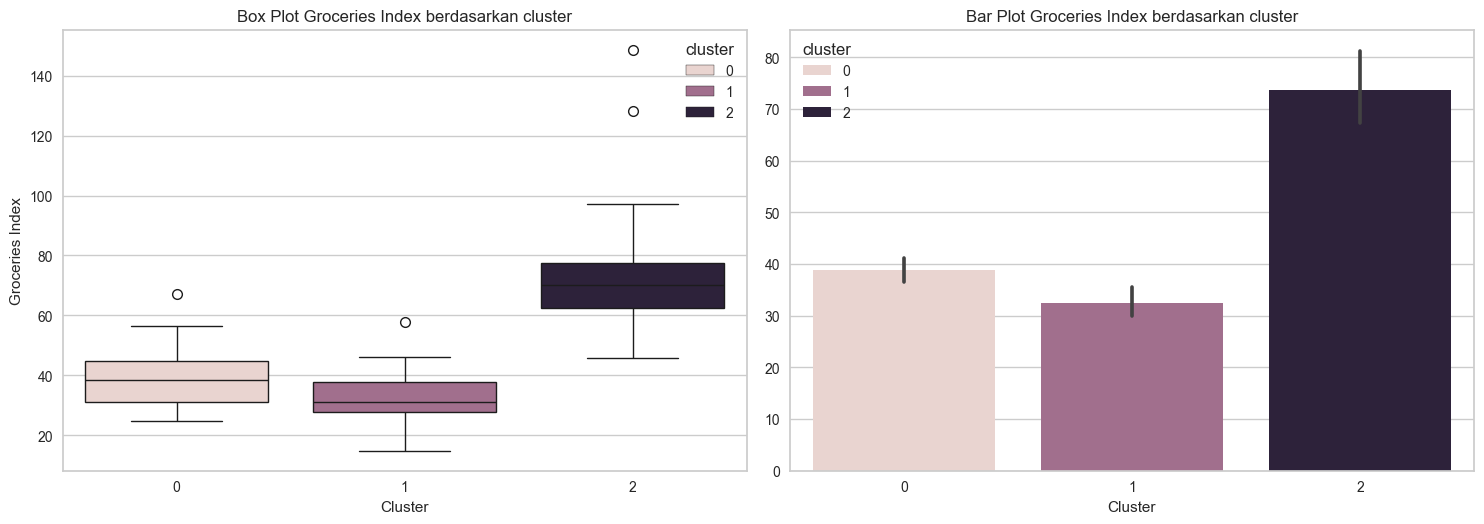

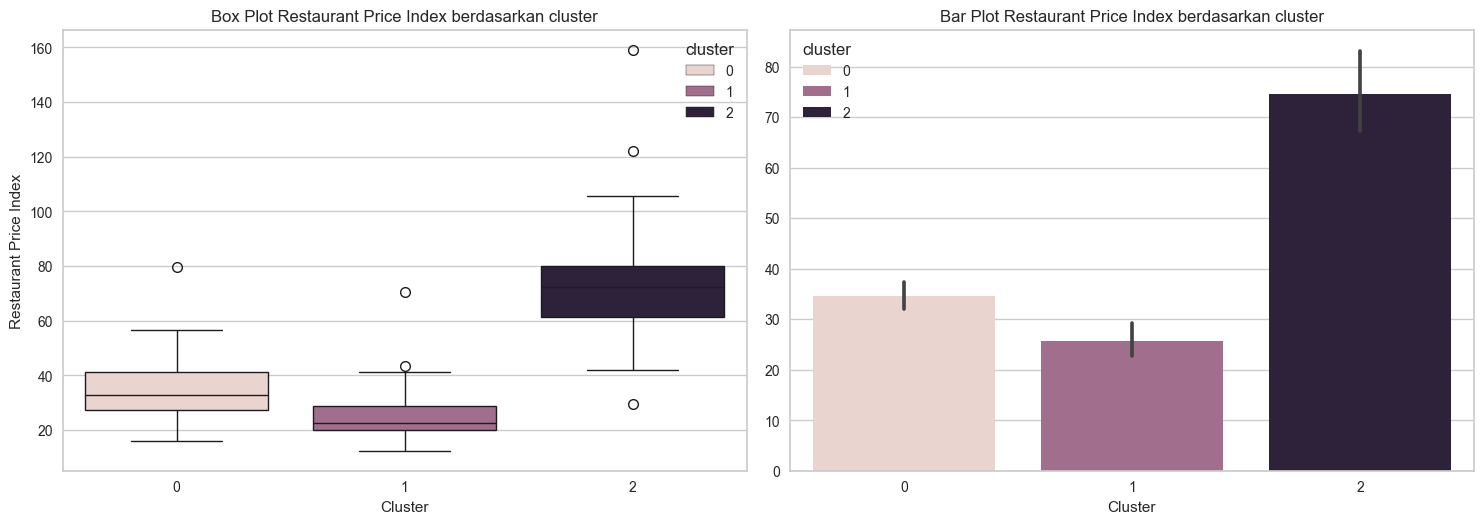

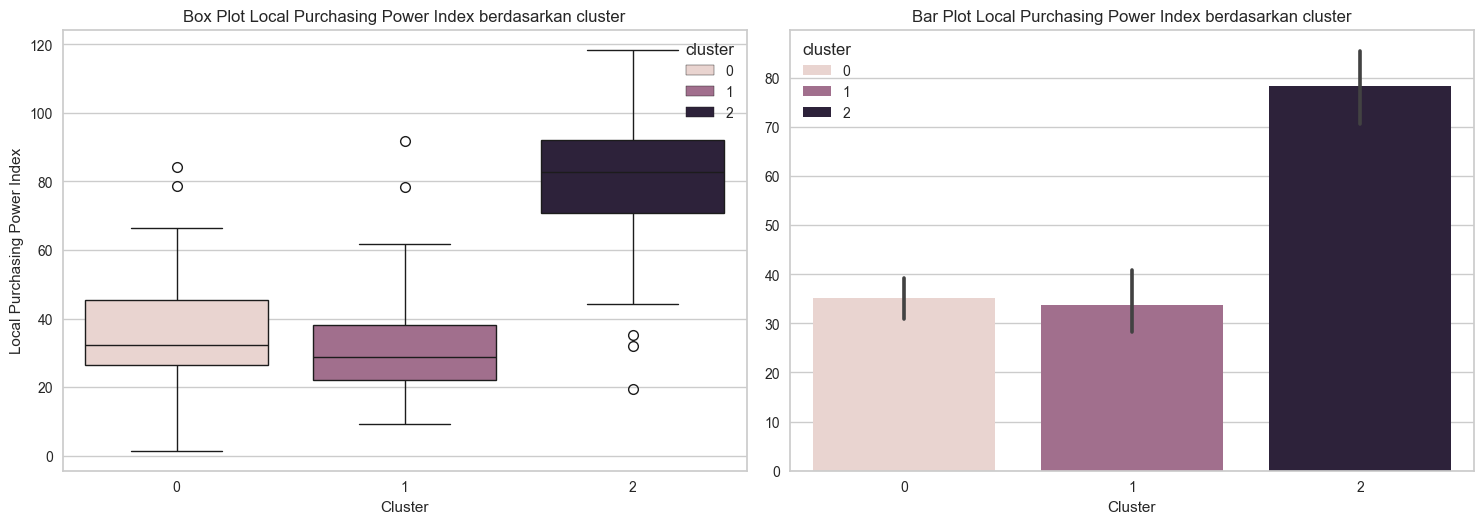

In [237]:
# Visualisasi kolom berpengaruh

cols_selected = [
    'Cost of Living Index',
    'Rent Index',
    'Groceries Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index']



for col in cols_selected:
    plt.figure(figsize=(15,10))

    plt.subplot(2,2,1)
    sns.boxplot(data=data_analyz,y=col,x='cluster',  hue='cluster' )
    plt.title(f'Box Plot {col} berdasarkan cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)

    plt.subplot(2,2,2)
    sns.barplot(data=data_analyz, x='cluster',y=col, hue='cluster')
    plt.title(f'Bar Plot {col} berdasarkan cluster')
    plt.ylabel('')
    plt.xlabel('Cluster')

    plt.tight_layout()
    plt.show()

Explained:

Bedasarkan visualisasi dengan loop kolom berpengaruh saya kategorikan dari nilai rendah, sedang dan tinggi(mahal) dalam hal ini saya simpulkan `cluster 1 (satu) sebagai nilai rendah/murah`, `cluster 0 (nol) nilai sedang/terjangkau`, dan `cluster 2(dua) nilai tinggi/mahal`.
sebagai berikut penjelasan di tiap kolom:

- Cost of Living index memiliki cluster 1 sebagai nilai rendah, cluster 0 dengan nilai sedang , dan cluster 2 nilai tinggi
- Rent Index memiliki cluster 1 nilai rendah, cluster 0 nilai sedang, dan cluster 2 nilai mahal
- Groceries Index cluster 1 nilai rendah, cluster 0 nilai sedang, dan cluster 2 nilai mahal
- Restaurant Price Index cluster 1 nilai rendah, cluster 0 nilai sedang, dan cluster 2 nilai mahal
- Local Purchasing Power Index cluster 1 nilai rendah, cluster 0 nilai sedang, dan cluster 2 nilai mahal

Berdasarkan penjelasan tersebut bahwa saya akan merekomendasikan `cluster 1` karena semua biaya yang di keluarkan rendah

In [ ]:
# for col in df.columns:
#     if col != cluster_col:
#         plt.figure(figsize=(8,6))
#         sns.boxenplot(x=cluster_col, y=col, data=df, palette='mako')
#         plt.title(f'Box Plot {col} berdasarkan cluster')
#         plt.xlabel('Cluster')
#         plt.ylabel(col)
#         plt.show()

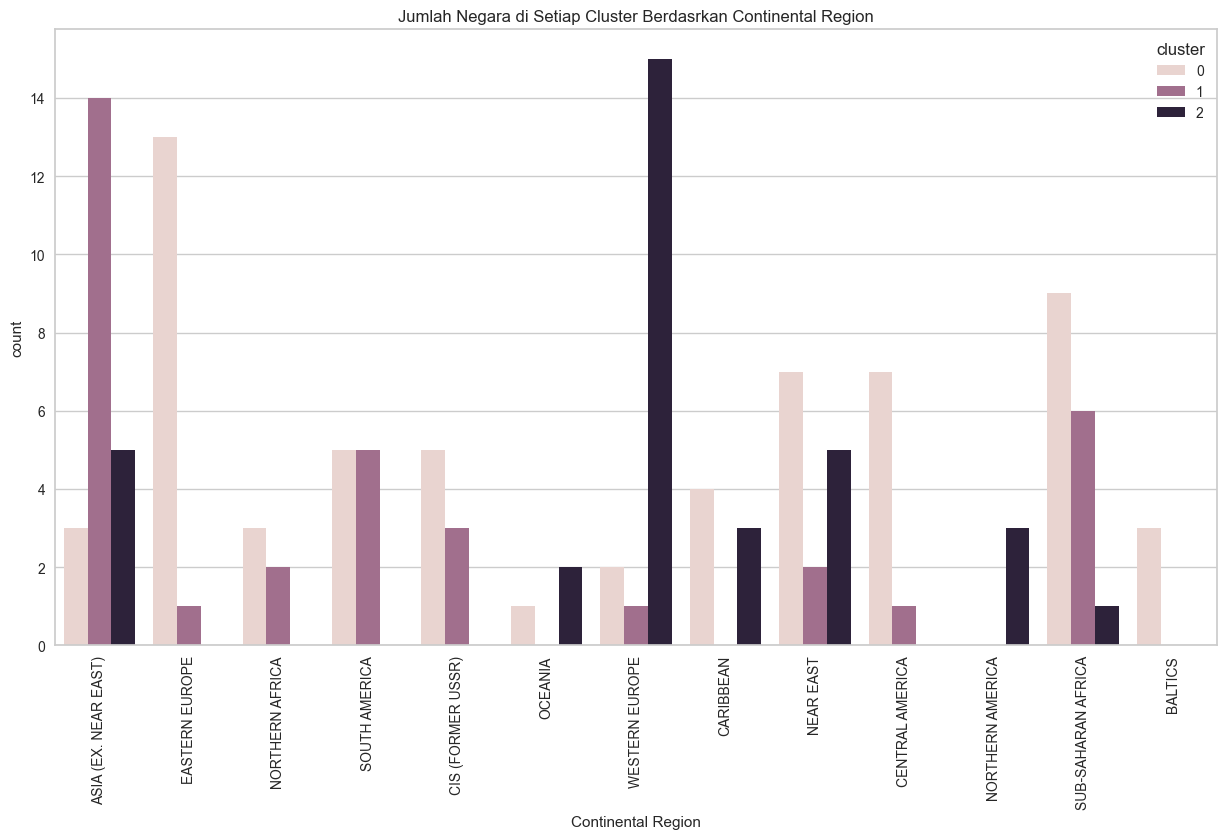

In [241]:
plt.figure(figsize=(15,8))
sns.countplot(x='Continental Region', data=data_analyz, hue='cluster')
plt.title("Jumlah Negara di Setiap Cluster Berdasrkan Continental Region")
plt.xticks(rotation=90) 
plt.show()


explained:

Berdasarkan hasil visualisasi menunjukkan Asia(Ex Near East) bahwa rata-rata negara nya dengan biaya hidup murah, sedangkan untuk Western Europe di dominasi dengan biaya hidup mahal.

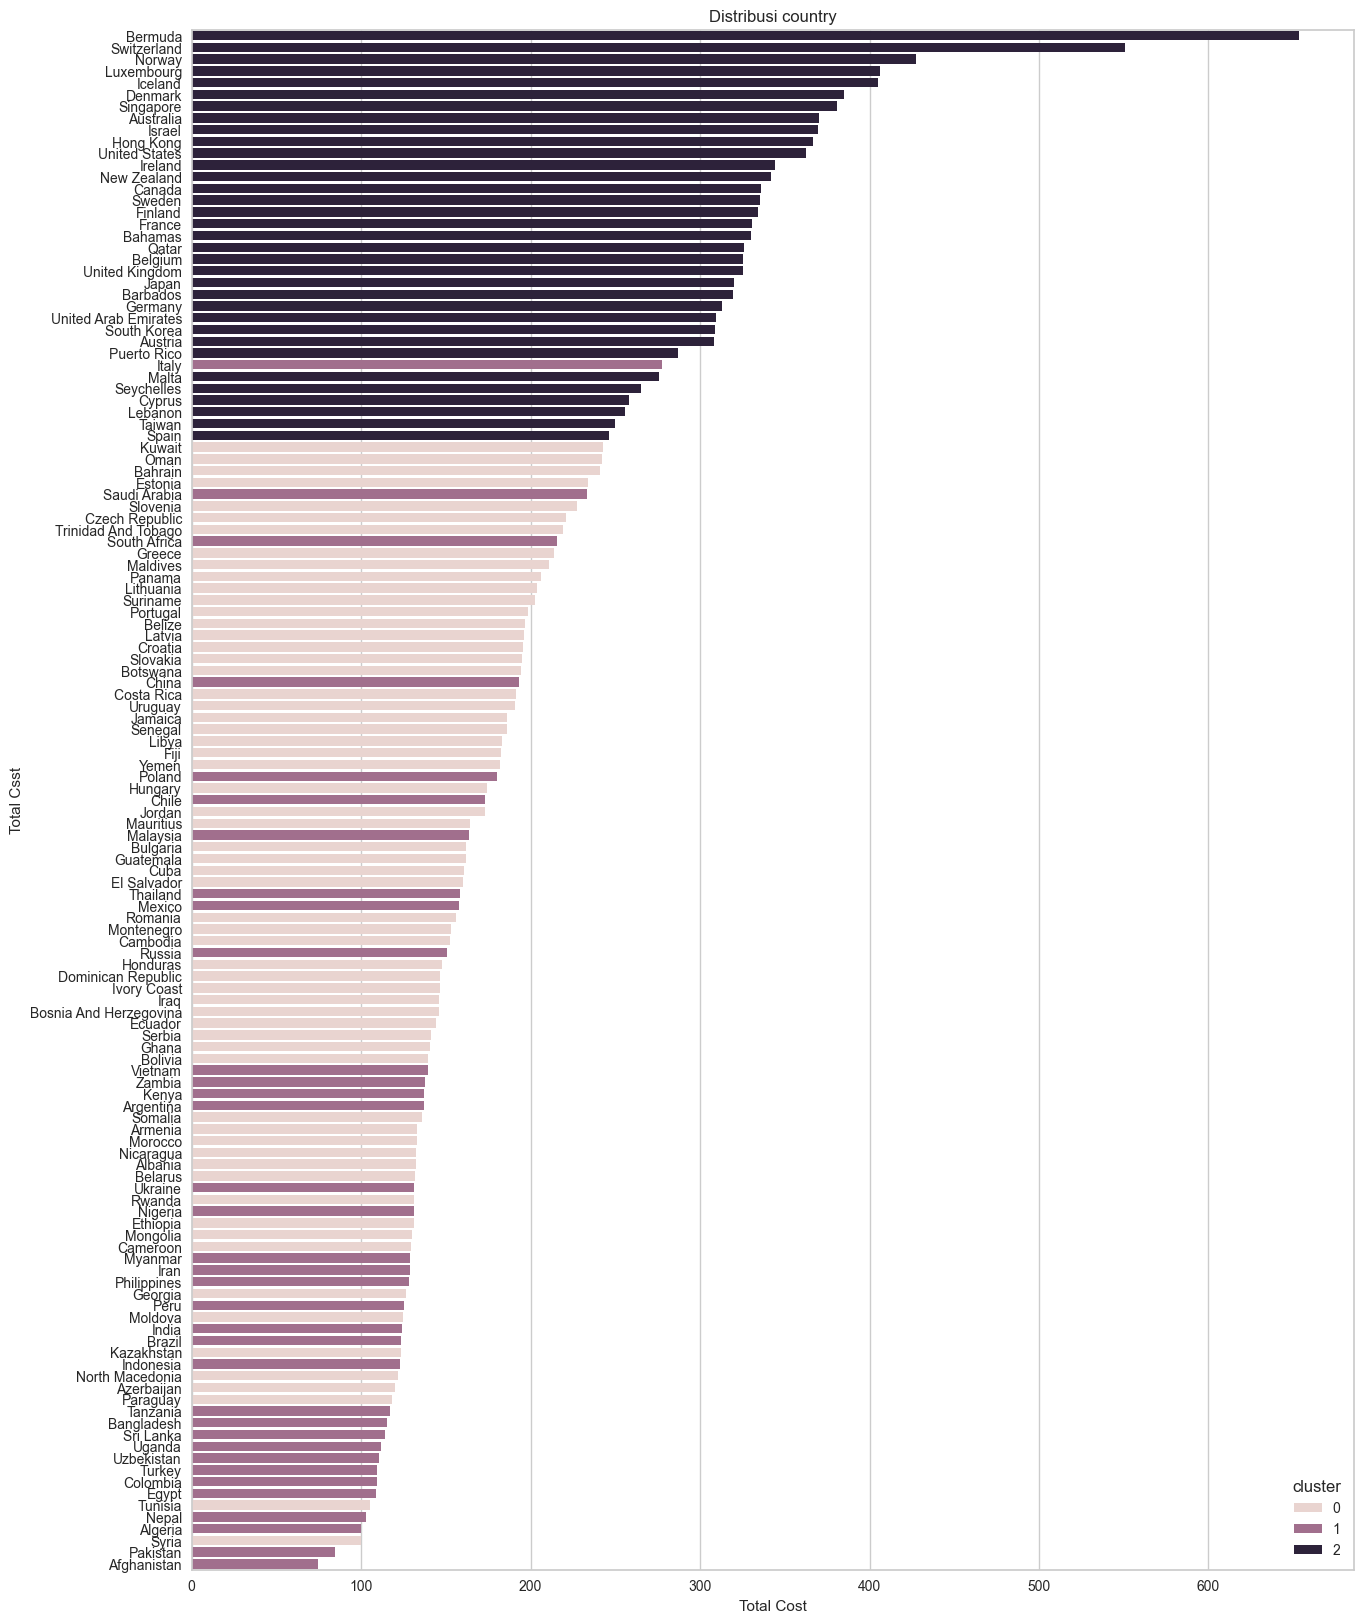

In [177]:
# plot data dari negara yang murah sampai yang termahal
plt.figure(figsize=(15, 20))
df_sorted = data_analyz.sort_values(by='Total Cost', ascending=False)

sns.barplot(x='Total Cost', y='Country', data=df_sorted, hue='cluster', estimator=np.mean)

plt.title('Distribusi country')
plt.xlabel('Total Cost')
plt.ylabel('Total Csst')

plt.show()



In [245]:
df_sorted = data_analyz.sort_values(by='Total Cost', ascending=True)
top_10_Negara_biaya_murah = df_sorted.head(10)

In [246]:
top_10_Negara_biaya_murah

Country Country code    Continental Region  Cost of Living Index  \
0    Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
92      Pakistan           PK  ASIA (EX. NEAR EAST)                 19.92   
120        Syria           SY             NEAR EAST                 28.75   
2        Algeria           DZ       NORTHERN AFRICA                 26.87   
84         Nepal           NP  ASIA (EX. NEAR EAST)                 28.29   
125      Tunisia           TN       NORTHERN AFRICA                 27.87   
35         Egypt           EG       NORTHERN AFRICA                 29.52   
26      Colombia           CO         SOUTH AMERICA                 26.72   
126       Turkey           TR             NEAR EAST                 28.31   
133   Uzbekistan           UZ     CIS (FORMER USSR)                 27.31   

     Rent Index  Groceries Index  Restaurant Price Index  \
0          2.72            14.92                   12.41   
92         3.91            17.81                   15.54   
120        5.17            29.34                   22.81   
2          4.59            28.82                   14.48   
84         3.96            26.45                   20.41   
125        5.32            27.36                   15.96   
35         5.82            27.42                   23.42   
26         8.18            23.47                   19.44   
126        6.63            22.64                   18.40   
133        9.29            26.83                   24.22   

     Local Purchasing Power Index  Number of Internet Plans  \
0                           23.04                      35.0   
92                          26.63                      60.0   
120                          6.59                      14.0   
2                           24.63                      20.0   
84                          22.96                      35.0   
125                         27.83                      25.0   
35                          21.54                      40.0   
26                          28.85                      60.0   
126                         32.88                      60.0   
133                         22.37                      60.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                           1.02                          0.38   
92                          0.59                          0.06   
120                         7.15                          0.19   
2                           0.51                          0.16   
84                          0.61                          0.22   
125                         1.09                          0.33   
35                          1.04                          0.02   
26                          2.80                          0.42   
126                         0.63                          0.05   
133                         0.60                          0.01   

     Most Expensive Price per 1GB (USD) Internet Users   Population  \
0                                  2.12      4,068,194   37,171,921   
92                                 8.59    118,800,000  213,756,286   
120                               38.80      6,257,430   16,945,057   
2                                  2.24     26,350,000   42,228,408   
84                                 2.66     16,190,000   28,095,714   
125                                3.63      6,400,330   11,565,201   
35                                 2.38     54,740,141   98,423,598   
26                                 9.88     30,548,252   49,661,048   
126                                2.26     69,945,905   82,340,088   
133                               23.75     16,692,456   32,476,244   

     Total Cost Cost Category  cluster  
0         74.48         Murah        1  
92        84.40         Murah        1  
120       99.81         Murah        0  
2         99.90         Murah        1  
84       102.68         Murah        1  
125      105.43         Murah        0  
35       1

In [261]:
data_cluster_1 = data_analyz[data_analyz['cluster'] == 1]
data_sort_cluster1 = data_cluster_1.sort_values(by='Total Cost')
top_rekomendasi_5_Negara_biaya_murah = data_sort_cluster1.head(5)
top_rekomendasi_5_Negara_biaya_murah

Country Country code    Continental Region  Cost of Living Index  \
0   Afghanistan           AF  ASIA (EX. NEAR EAST)                 20.37   
92     Pakistan           PK  ASIA (EX. NEAR EAST)                 19.92   
2       Algeria           DZ       NORTHERN AFRICA                 26.87   
84        Nepal           NP  ASIA (EX. NEAR EAST)                 28.29   
35        Egypt           EG       NORTHERN AFRICA                 29.52   

    Rent Index  Groceries Index  Restaurant Price Index  \
0         2.72            14.92                   12.41   
92        3.91            17.81                   15.54   
2         4.59            28.82                   14.48   
84        3.96            26.45                   20.41   
35        5.82            27.42                   23.42   

    Local Purchasing Power Index  Number of Internet Plans  \
0                          23.04                      35.0   
92                         26.63                      60.0   
2                          24.63                      20.0   
84                         22.96                      35.0   
35                         21.54                      40.0   

    Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
0                          1.02                          0.38   
92                         0.59                          0.06   
2                          0.51                          0.16   
84                         0.61                          0.22   
35                         1.04                          0.02   

    Most Expensive Price per 1GB (USD) Internet Users   Population  \
0                                 2.12      4,068,194   37,171,921   
92                                8.59    118,800,000  213,756,286   
2                                 2.24     26,350,000   42,228,408   
84                                2.66     16,190,000   28,095,714   
35                                2.38     54,740,141   98,423,598   

    Total Cost Cost Category  cluster  
0        74.48         Murah        1  
92       84.40         Murah        1  
2        99.90         Murah        1  
84      102.68         Murah        1  
35      108.76         Murah        1

In [262]:
data_cluster_0 = data_analyz[data_analyz['cluster'] == 0]
data_sort_cluster0 = data_cluster_0.sort_values(by='Total Cost')
top_rekomendasi_5_Negara_biaya_murah_cluster0 = data_sort_cluster0.head(5)
top_rekomendasi_5_Negara_biaya_murah_cluster0

Country Country code Continental Region  Cost of Living Index  \
120            Syria           SY          NEAR EAST                 28.75   
125          Tunisia           TN    NORTHERN AFRICA                 27.87   
95          Paraguay           PY      SOUTH AMERICA                 30.20   
7         Azerbaijan           AZ  CIS (FORMER USSR)                 29.73   
89   North Macedonia           MK     EASTERN EUROPE                 31.38   

     Rent Index  Groceries Index  Restaurant Price Index  \
120        5.17            29.34                   22.81   
125        5.32            27.36                   15.96   
95        10.04            25.45                   24.19   
7          7.86            26.57                   26.73   
89         6.06            26.95                   21.02   

     Local Purchasing Power Index  Number of Internet Plans  \
120                          6.59                      14.0   
125                         27.83                      25.0   
95                          26.08                      27.0   
7                           27.26                      42.0   
89                          35.44                      18.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
120                         7.15                          0.19   
125                         1.09                          0.33   
95                          2.53                          0.73   
7                           1.82                          0.24   
89                          0.96                          0.48   

     Most Expensive Price per 1GB (USD) Internet Users  Population  \
120                               38.80      6,257,430  16,945,057   
125                                3.63      6,400,330  11,565,201   
95                                 9.12      4,160,340   6,956,066   
7                                  9.80      7,763,795   9,949,537   
89                                 9.60      1,589,659   2,082,957   

     Total Cost Cost Category  cluster  
120       99.81         Murah        0  
125      105.43         Murah        0  
95       118.49         Murah        0  
7        119.97         Murah        0  
89       121.81         Murah        0

In [264]:
data_cluster_2 = data_analyz[data_analyz['cluster'] ==2]
data_sort_cluster2 = data_cluster_2.sort_values(by='Total Cost')
top_rekomendasi_5_Negara_biayamahal_cluster2 = data_sort_cluster2.head(5)
top_rekomendasi_5_Negara_biayamahal_cluster2

Country Country code    Continental Region  Cost of Living Index  \
115       Spain           ES        WESTERN EUROPE                 53.88   
121      Taiwan           TW  ASIA (EX. NEAR EAST)                 62.35   
68      Lebanon           LB             NEAR EAST                 69.62   
30       Cyprus           CY             NEAR EAST                 59.03   
108  Seychelles           SC    SUB-SAHARAN AFRICA                 65.93   

     Rent Index  Groceries Index  Restaurant Price Index  \
115       21.25            45.69                   53.96   
121       17.69            76.19                   29.42   
68        24.81            66.83                   54.25   
30        22.36            49.20                   61.15   
108       32.35            61.55                   77.01   

     Local Purchasing Power Index  Number of Internet Plans  \
115                         70.04                      44.0   
121                         58.35                      42.0   
68                          35.12                      15.0   
30                          57.31                      22.0   
108                         19.43                      21.0   

     Average Price per 1GB (USD)  Cheapest Price per 1GB (USD)  \
115                         1.24                          0.57   
121                         5.67                          0.42   
68                          4.81                          1.21   
30                          8.84                          2.06   
108                         8.64                          2.36   

     Most Expensive Price per 1GB (USD) Internet Users  Population  \
115                               57.98     42,400,756  46,692,858   
121                               46.67     21,920,626  23,726,460   
68                                77.70      4,755,187   6,859,408   
30                                59.10        952,369   1,189,265   
108                               22.67         55,677      97,096   

     Total Cost Cost Category  cluster  
115      246.06        Sedang        2  
121      249.67        Sedang        2  
68       255.44        Sedang        2  
30       257.89        Sedang        2  
108      264.91         Mahal        2

# Kesimpulan

Berdasarkan analisis saya bahwa ada perbedaan antara analisis sederhana dengan analisis setelah clustering terutama dalam keakuratan dalam mengelompokan data, clustering lebih jelas. berikut kesimplun tersebut:

Exploratory Data Analysis  

Dari hasil Exploratory data dengan melakukan agregasi sederhana saya merkomendasikan 3 Negara yaitu:

Continental Region | Nama Negara | Biaya Hidup 
--- | --- | ---
Northen Africa | Algeria | $99.90 (USD)
CIS(FORMER USSR) | Uzbekistan | $110.62 (USD)
South America | Colombia | $109.46 (USD)

Exploratory Data Analysis Cluster  

Dari hasil clustering bahwa cluster 1 cenderung biaya hidup murah, cluster 0 cenderung sedang(terjangkau), dan cluster 2 cenderung mahal, adapun` Asia(Ex Near East)` bahwa rata-rata negara nya dengan biaya hidup murah, sedangkan untuk `Western Europe` di dominasi dengan biaya hidup mahal. sehingga saya merkomendasikan `cluster 1` dengan  negara yang memiliki biaya hidup murah. berikut rekomendasi:
Country | Total Cost
--- | ---
Afghanistan | $74.48
Pakistan | $84.40
Algeria | $99.90
Nepal | $102.68
Egypt | $108.76

Optional: 
saya rekomendasikan 10 Negara dengan biaya murah yaitu:
Country name | Total cost
---  | ---
Afghanistan | $74.48
Pakistan | $84.40	
Syria | $99.81
Algeria | $99.90
Nepal | $102.68
Tunisia | $105.43	
Egypt | $108.76
Colombia | $109.46
Turkey | $109.49
Uzbekistan | $110.62


Bisnis rekomendasi:
- Membuat system rekomendasi untuk impor dan ekspor 

Artikel : 
- Afganistan https://id.wikipedia.org/wiki/Afganistan
- Pakistan https://id.wikipedia.org/wiki/Pakistan
- Algeria https://id.wikipedia.org/wiki/Aljazair 
- Nepal https://id.wikipedia.org/wiki/Nepal
- Egypt https://en.wikivoyage.org/wiki/Egypt